## Problem Statement

Financial institutions often face significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and there is an increase in vehicle loan rejection rates.

The need for a better credit risk predicting model is what is demanded by these institutions. This warrants a study to estimate the determinants of vehicle loan default.

A financial institution has a requirement to accurately predict the probability of loanee/borrower defaulting on a vehicle loan.

Following Information regarding the loan and loanee are taken into consideration in the datasets:

○ Loanee Information (Demographic data like age, Identity proof etc.)

○ Loan Information (Disbursal details, loan to value ratio etc.)

○ Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

This project will help to ensure that clients who are capable of repayment are not rejected and important determinants can be identified which can be further used for minimizing the default rates on these loans.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

#Setting Format
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

#### Reading the data  - Data Understanding

In [4]:
df = pd.read_csv('train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.550,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.230,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.630,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.480,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.390,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
df.shape

(233154, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

The dataset contains 40 features including the target feature and 233154 rows.

In [7]:
#Understanding the dataset:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000
mean,535917.573,54356.994,75865.068,74.747,72.936,19638.635,69.028,3396.880,7.262,1549.477,1.000,0.840,0.076,0.145,0.023,0.002,289.463,2.441,1.040,0.157,165900.077,218503.855,218065.899,0.059,0.028,0.007,5427.793,7295.923,7179.998,13105.482,323.268,0.382,0.097,0.207,0.217
std,68315.694,12971.314,18944.781,11.457,69.835,3491.950,22.141,2238.148,4.482,975.261,0.000,0.366,0.264,0.352,0.151,0.046,338.375,5.217,1.941,0.549,942273.582,2374794.126,2377743.846,0.627,0.316,0.111,170236.995,183155.993,182592.500,151367.905,15553.691,0.955,0.384,0.706,0.412
min,417428.000,13320.000,37000.000,10.030,1.000,10524.000,45.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-6678296.000,0.000,0.000,0.000,0.000,0.000,-574647.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,476786.250,47145.000,65717.000,68.880,14.000,16535.000,48.000,1511.000,4.000,713.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,535978.500,53803.000,70946.000,76.800,61.000,20333.000,86.000,2970.000,6.000,1451.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,595039.750,60413.000,79201.750,83.670,130.000,23000.000,86.000,5677.000,10.000,2362.000,1.000,1.000,0.000,0.000,0.000,0.000,678.000,3.000,1.000,0.000,35006.500,62500.000,60800.000,0.000,0.000,0.000,0.000,0.000,0.000,1999.000,0.000,0.000,0.000,0.000,0.000
max,671084.000,990572.000,1628992.000,95.000,261.000,24803.000,156.000,7345.000,22.000,3795.000,1.000,1.000,1.000,1.000,1.000,1.000,890.000,453.000,144.000,25.000,96524920.000,1000000000.000,1000000000.000,52.000,36.000,8.000,36032852.000,30000000.000,30000000.000,25642806.000,4170901.000,35.000,20.000,36.000,1.000


### EDA - Categorical Variables

### Checking for missing values:

In [8]:
#missing  values
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

Only Employment.Type feature is having the missing the values. Hence understanding the particular feature using EDA

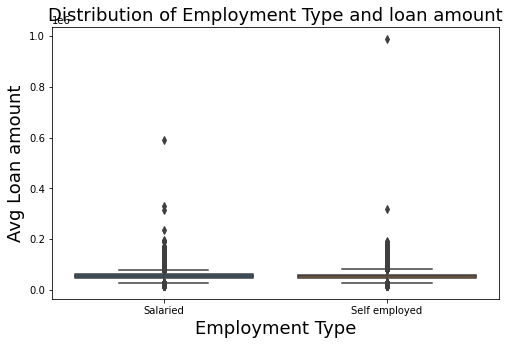

In [9]:
#Relationship between Employement Type and loan default
plt.figure(figsize=(8,5))
sns.boxplot(df['Employment.Type'],df['disbursed_amount'])
plt.title('Distribution of Employment Type and loan amount', size = 18)
plt.xlabel('Employment Type', size = 18)
plt.ylabel('Avg Loan amount', size = 18)
plt.show()

There is no difference in the loan amount given to the customer wrt employment type

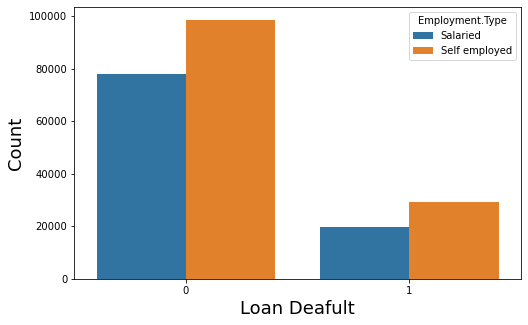

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(df['loan_default'], hue = df['Employment.Type'])
plt.xlabel('Loan Deafult', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

The ratio of customers being loan defaulters is equal to the ratio of customers not being defaulters for the customers who are salaried

In [11]:
## Check the count of each cateogry(Employeement)

df['Employment.Type'].value_counts(normalize = True)

Self employed   0.566
Salaried        0.434
Name: Employment.Type, dtype: float64

In [12]:
## Impute the null values with mode
df['Employment.Type'] = df['Employment.Type'].fillna(df['Employment.Type'].mode()[0])
df['Employment.Type'].value_counts(normalize = True)

Self employed   0.580
Salaried        0.420
Name: Employment.Type, dtype: float64

There's a slight change in counts which is acceptable comparing to the size of the dataset

In [13]:
#Reading the dataset
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.550,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.230,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.630,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.480,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.390,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [14]:
print('No of unique value in UniqueID : ',len(df.UniqueID.unique()))
print('No of unique value in Current_pincode_ID : ',len(df.Current_pincode_ID.unique()))
print('No of unique value in branch_id : ',len(df.branch_id.unique()))

No of unique value in UniqueID :  233154
No of unique value in Current_pincode_ID :  6698
No of unique value in branch_id :  82


As there are too many unique values in features like UniqueID,Current_pincode_ID,branch_id ; they can removed from teh dataframe

In [15]:
df = df.drop(['UniqueID','Current_pincode_ID','branch_id'],1)

### Understading the distribution of other features

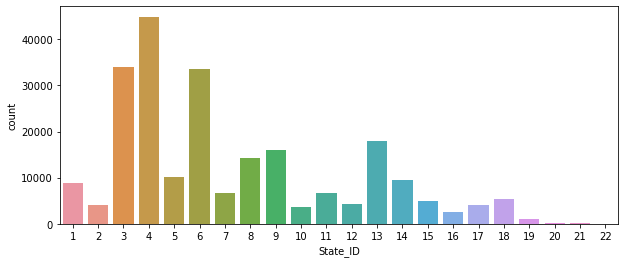

In [16]:
#State ID
plt.figure(figsize=(10,4))
sns.countplot(df['State_ID'])
plt.show()

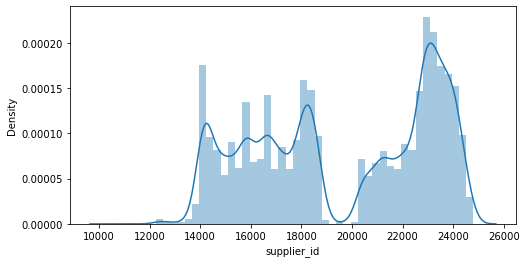

In [17]:
#supplier_id
plt.figure(figsize=(8,4))
sns.distplot(df['supplier_id'],hist=True)
plt.show()

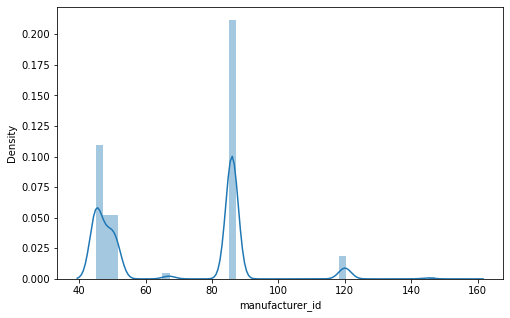

In [18]:
#manufacturer_id
plt.figure(figsize=(8,5))
sns.distplot(df['manufacturer_id'],hist=True)
plt.show()

In [19]:
#Flag variables:

flag1 = ['Driving_flag','Passport_flag','VoterID_flag','PAN_flag','Aadhar_flag','MobileNo_Avl_Flag']

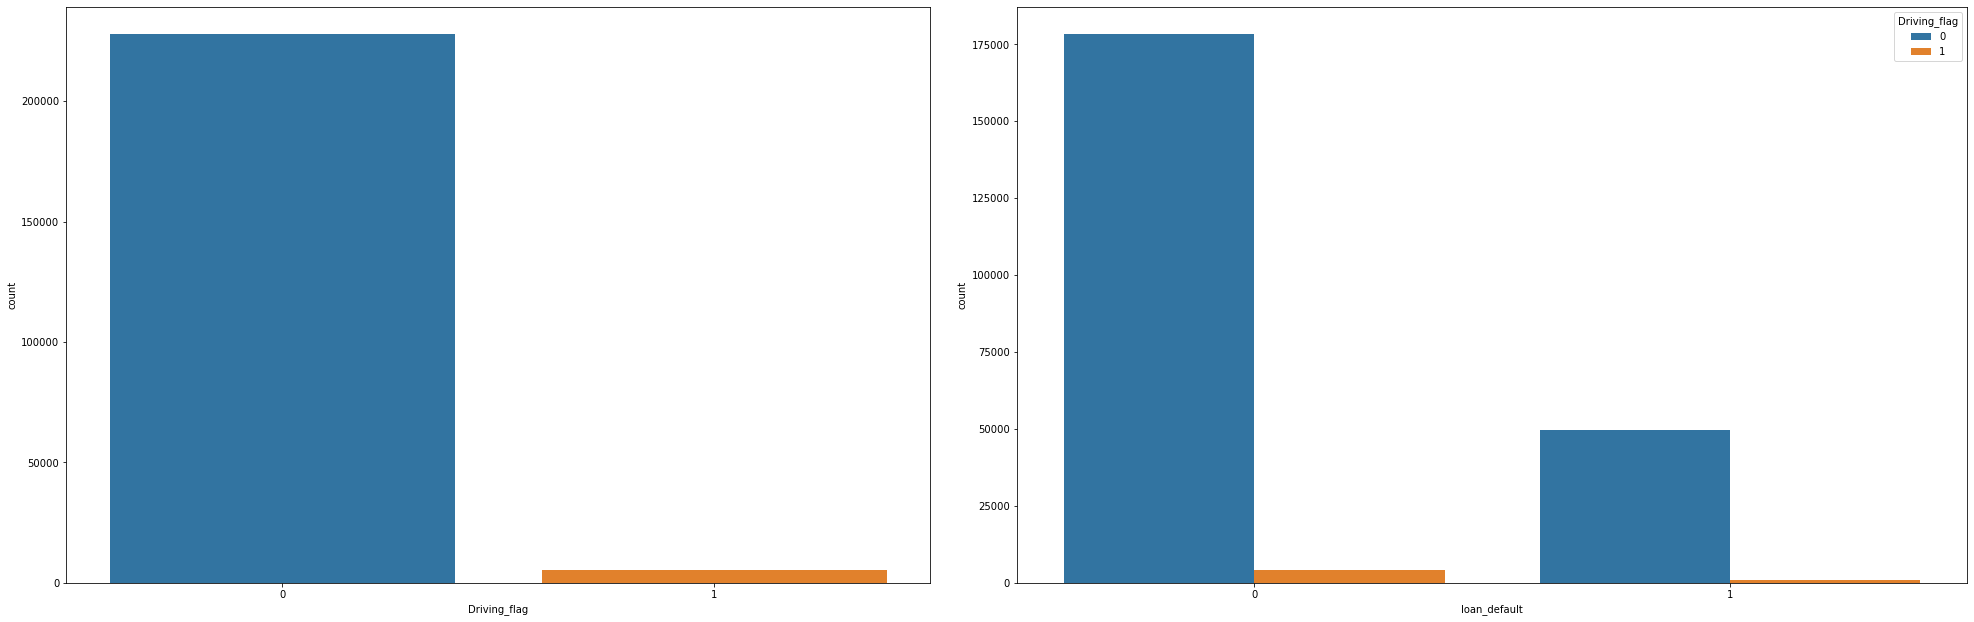

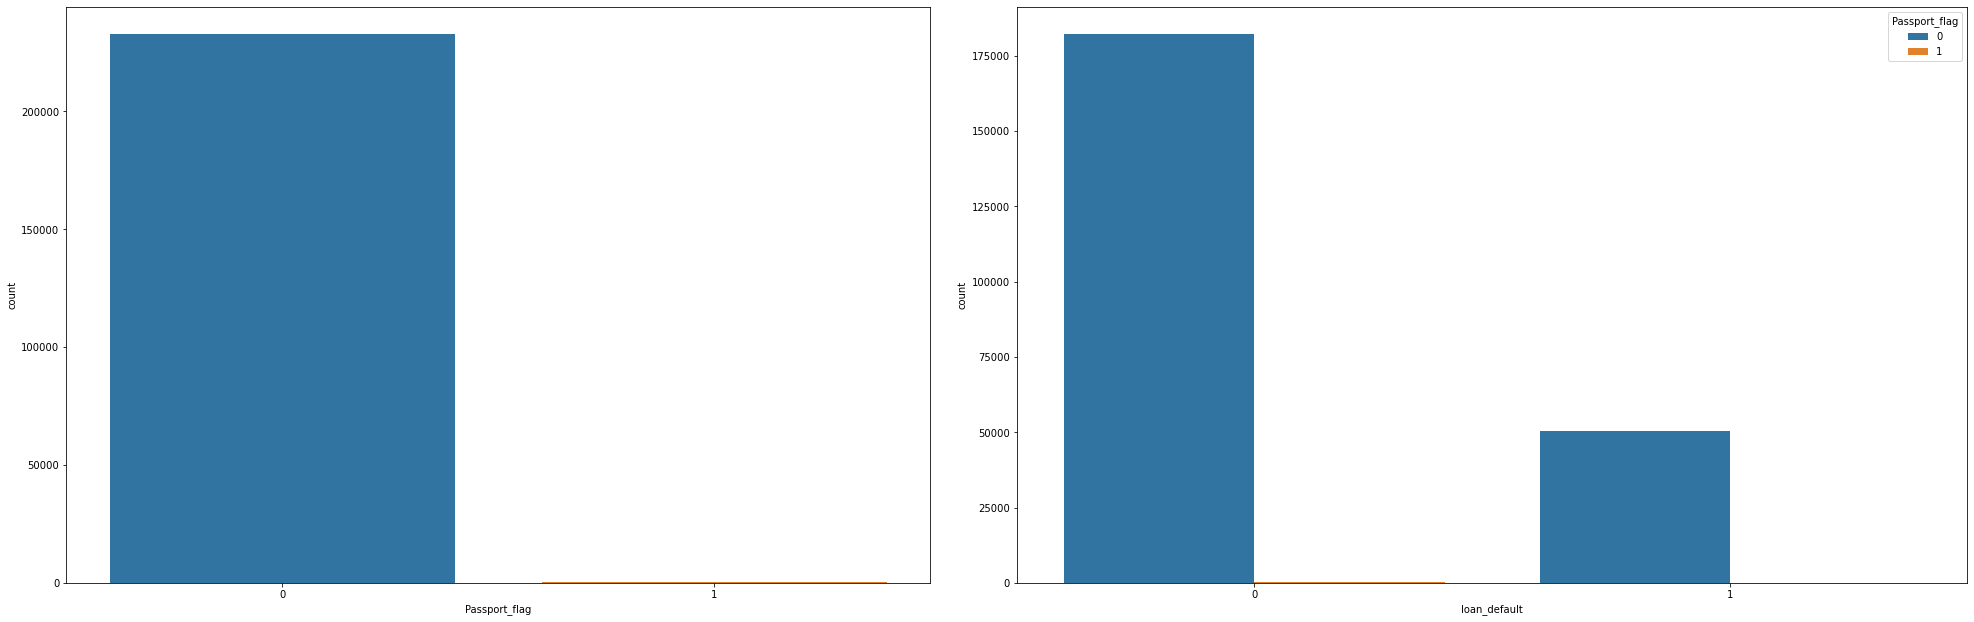

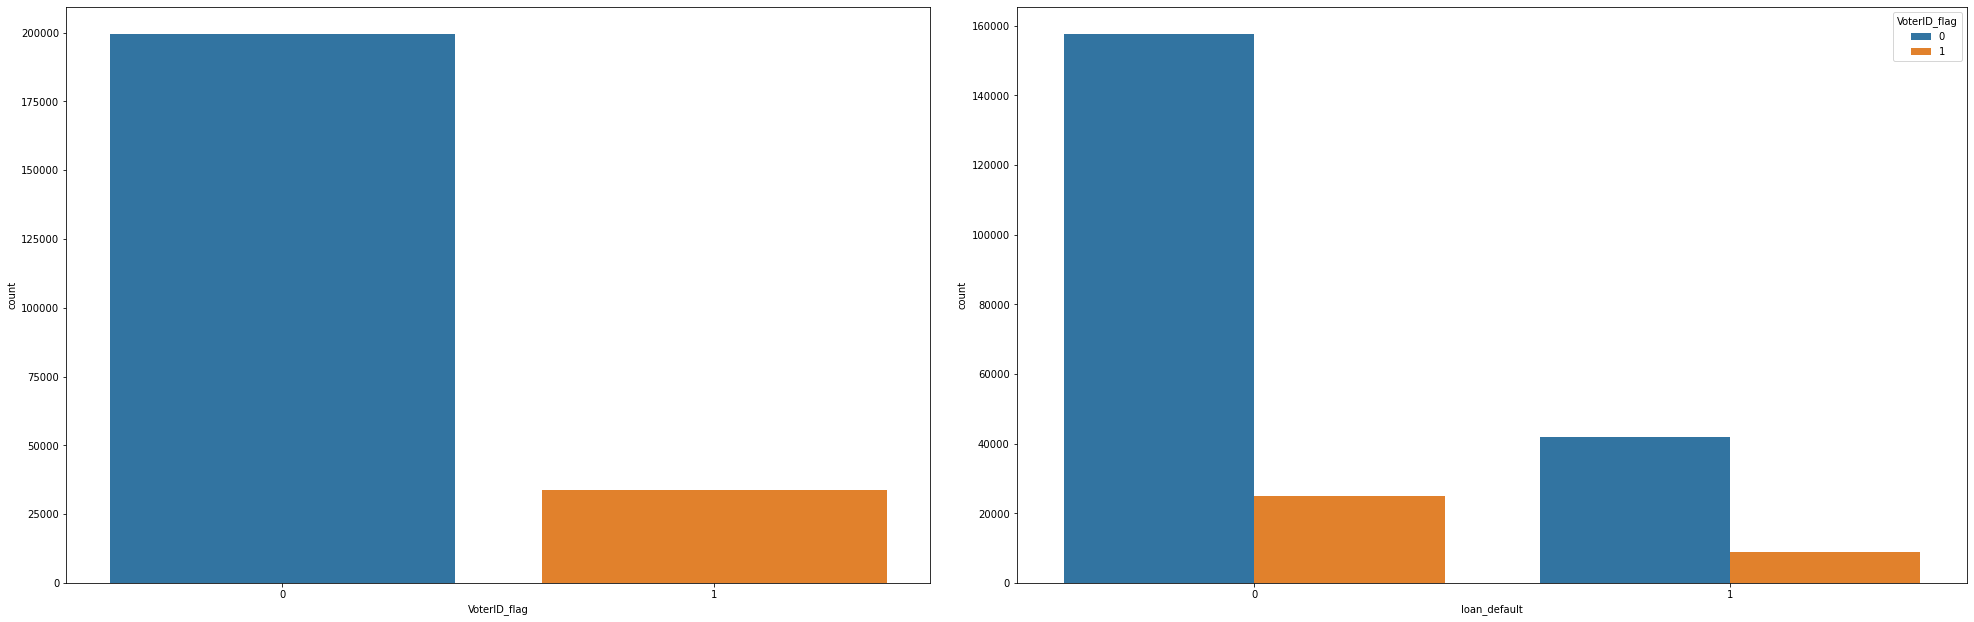

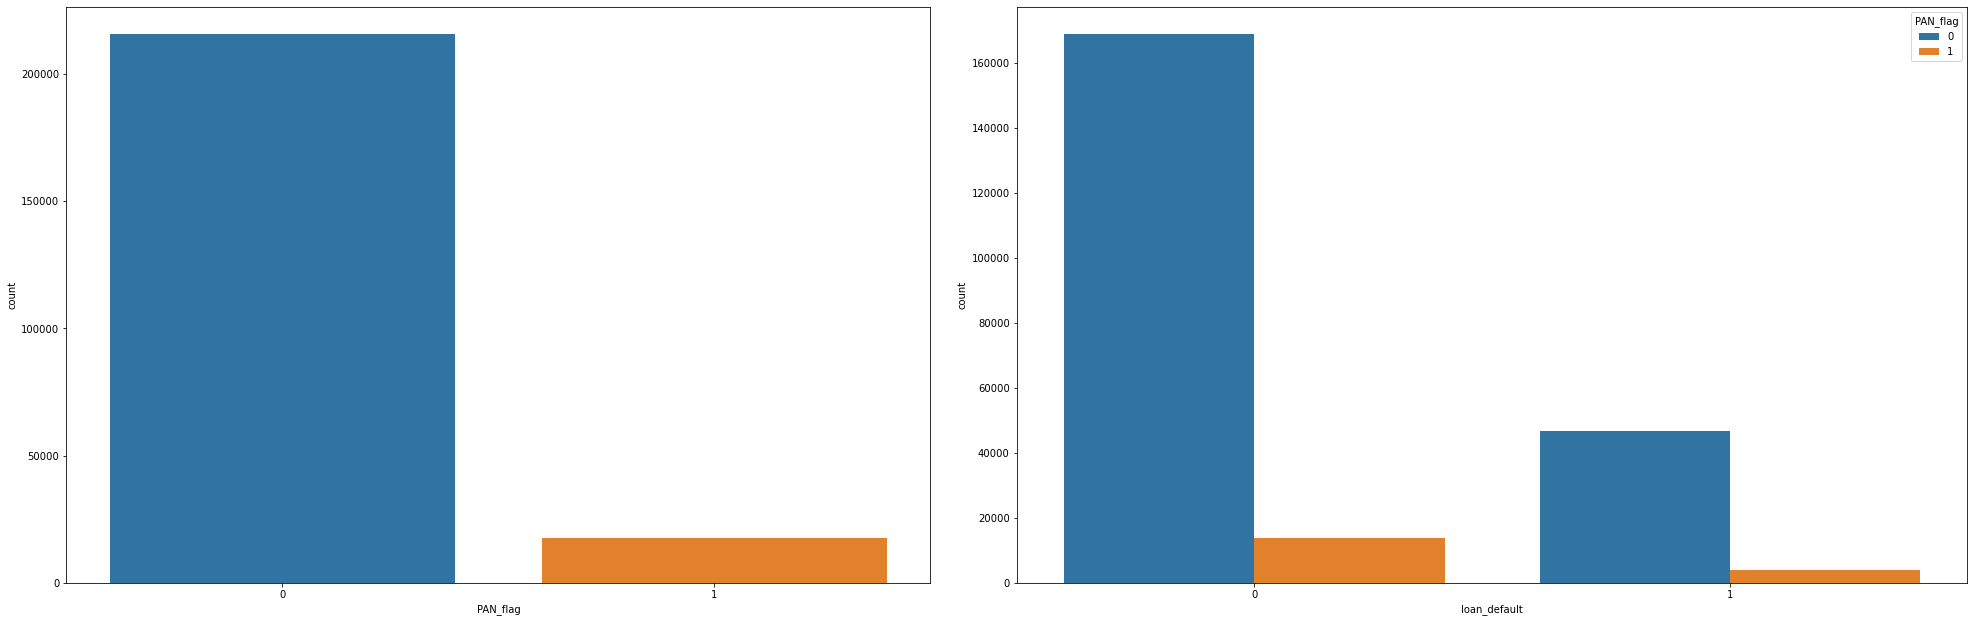

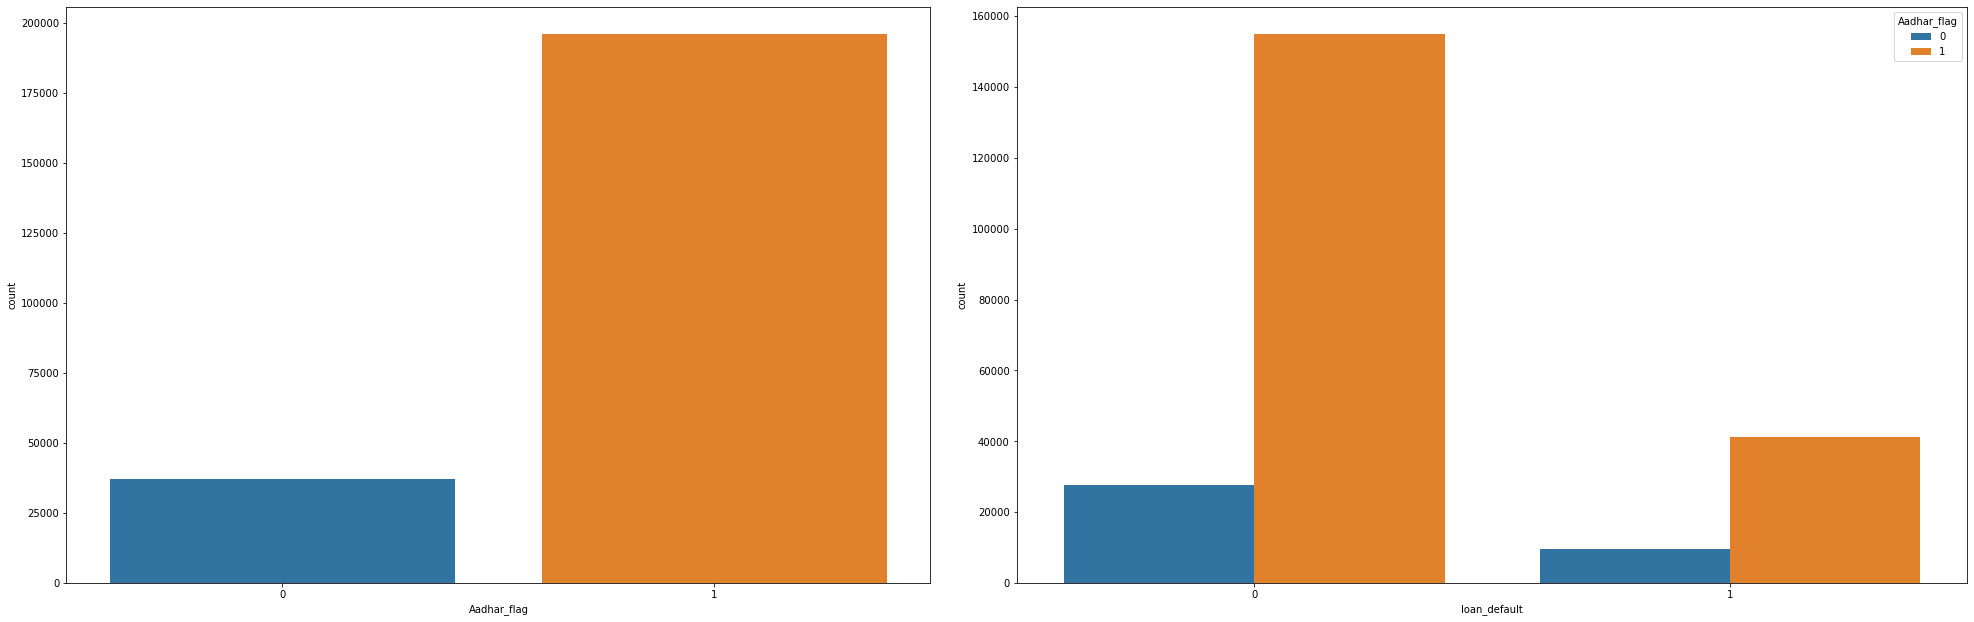

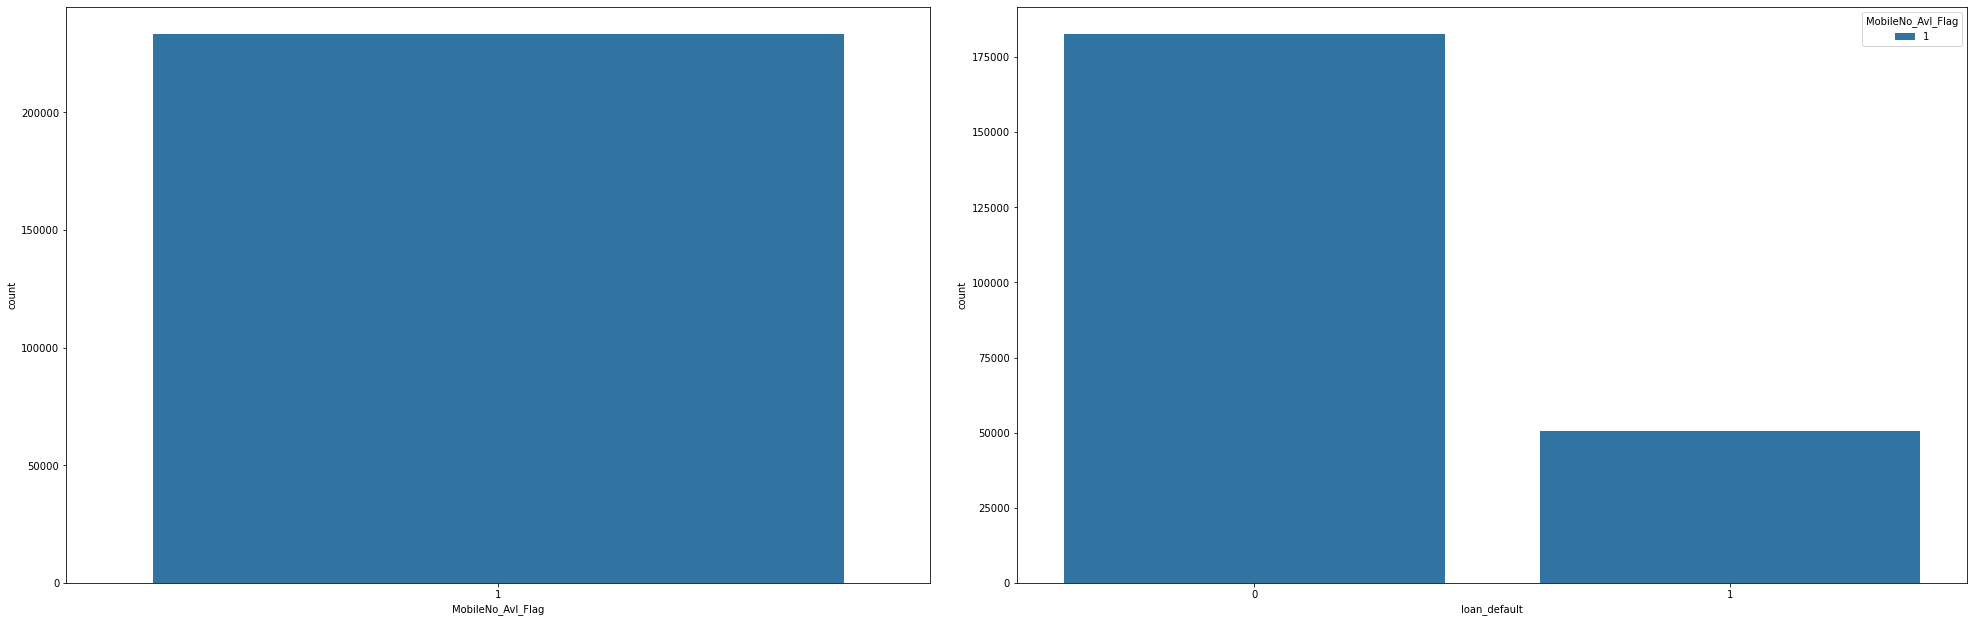

In [20]:
for i in (flag1):
    figure= plt.figure()
    
    axes1 = figure.add_axes([0, 0, 2, 2]) 
    axes2 = figure.add_axes([2.2, 0, 2.2, 2])
    
    sns.countplot(df[i],ax=axes1)
    sns.countplot(df['loan_default'], hue = df[i],ax=axes2)
    plt.show()

The ratio of customers being loan defaulters is equal to the ratio of customers not being defaulters for those customers who have given the aadhar number. So this feature will not be considered individually in the model

Self employeed customers are more in both submitted group and not submitted group. Only quarter of the people have not submitted their aadhar card number

All the customers have given their mobile number. And as a result it will not make any effect on the target column

The number of loan defaulters who have submitted their Passport are very low

Hence these features are not significant and hence they can be dropped.

In [21]:
#Dropping the variables not required

df = df.drop(['Driving_flag','Passport_flag','VoterID_flag','PAN_flag','Aadhar_flag','MobileNo_Avl_Flag'],1)

In [22]:
df.describe()

,disbursed_amount,asset_cost,ltv,supplier_id,manufacturer_id,State_ID,Employee_code_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000
mean,54356.994,75865.068,74.747,19638.635,69.028,7.262,1549.477,289.463,2.441,1.040,0.157,165900.077,218503.855,218065.899,0.059,0.028,0.007,5427.793,7295.923,7179.998,13105.482,323.268,0.382,0.097,0.207,0.217
std,12971.314,18944.781,11.457,3491.950,22.141,4.482,975.261,338.375,5.217,1.941,0.549,942273.582,2374794.126,2377743.846,0.627,0.316,0.111,170236.995,183155.993,182592.500,151367.905,15553.691,0.955,0.384,0.706,0.412
min,13320.000,37000.000,10.030,10524.000,45.000,1.000,1.000,0.000,0.000,0.000,0.000,-6678296.000,0.000,0.000,0.000,0.000,0.000,-574647.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47145.000,65717.000,68.880,16535.000,48.000,4.000,713.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,53803.000,70946.000,76.800,20333.000,86.000,6.000,1451.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,60413.000,79201.750,83.670,23000.000,86.000,10.000,2362.000,678.000,3.000,1.000,0.000,35006.500,62500.000,60800.000,0.000,0.000,0.000,0.000,0.000,0.000,1999.000,0.000,0.000,0.000,0.000,0.000
max,990572.000,1628992.000,95.000,24803.000,156.000,22.000,3795.000,890.000,453.000,144.000,25.000,96524920.000,1000000000.000,1000000000.000,52.000,36.000,8.000,36032852.000,30000000.000,30000000.000,25642806.000,4170901.000,35.000,20.000,36.000,1.000


In [23]:
## Inspecting the LTV variable

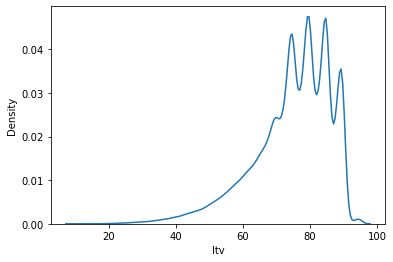

In [24]:
sns.distplot(df['ltv'],hist=False)
plt.show()

In [25]:
#Performing the box cox transformations
from scipy.stats import boxcox
a, b = boxcox(df['ltv'])
df['ltv'] = a

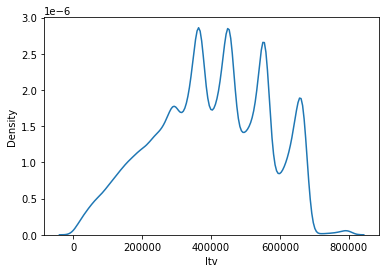

In [26]:
sns.distplot(df['ltv'],hist=False)
plt.show()

The feauture is normalised.

In [27]:
##Disbursed amount

In [28]:
df['disbursed_amount'].skew()

4.4922396638902455

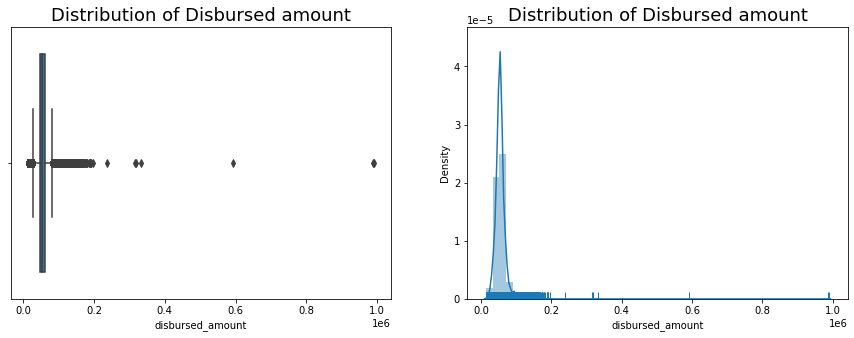

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
dist_plot = sns.boxplot(df['disbursed_amount'])
plt.title('Distribution of Disbursed amount', size = 18)
plt.subplot(1,2,2)
dist_plot = sns.distplot(df['disbursed_amount'], rug= True)
plt.title('Distribution of Disbursed amount', size = 18)

plt.show()

In [30]:
#removing the outliers
df['disbursed_amount'] = df['disbursed_amount'].clip(lower =df['disbursed_amount'].quantile(0.025), upper =  df['disbursed_amount'].quantile(0.975))

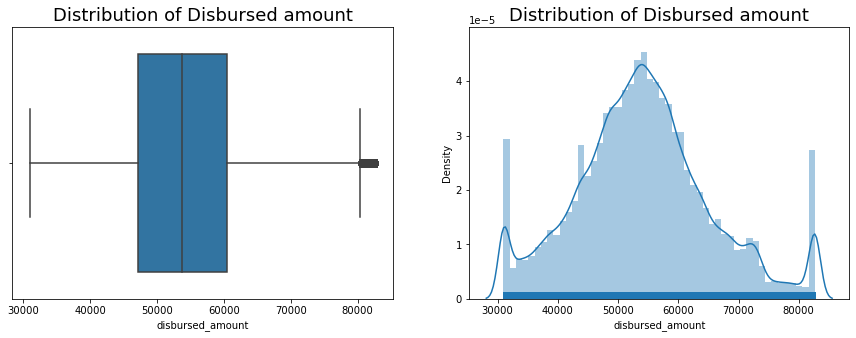

In [31]:
#Viewing the distribution
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
dist_plot = sns.boxplot(df['disbursed_amount'])
plt.title('Distribution of Disbursed amount', size = 18)
plt.subplot(1,2,2)
dist_plot = sns.distplot(df['disbursed_amount'], rug= True)
plt.title('Distribution of Disbursed amount', size = 18)

plt.show()

#### Outliers are removed and the skewed distribution is normalised.

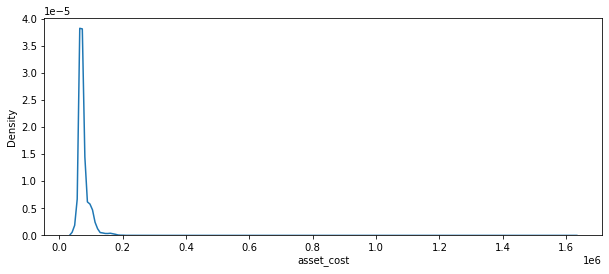

In [32]:
#Asset cost
plt.figure(figsize=(10,4))
sns.distplot(df['asset_cost'],hist=False)
plt.show()

<AxesSubplot:xlabel='asset_cost', ylabel='Density'>

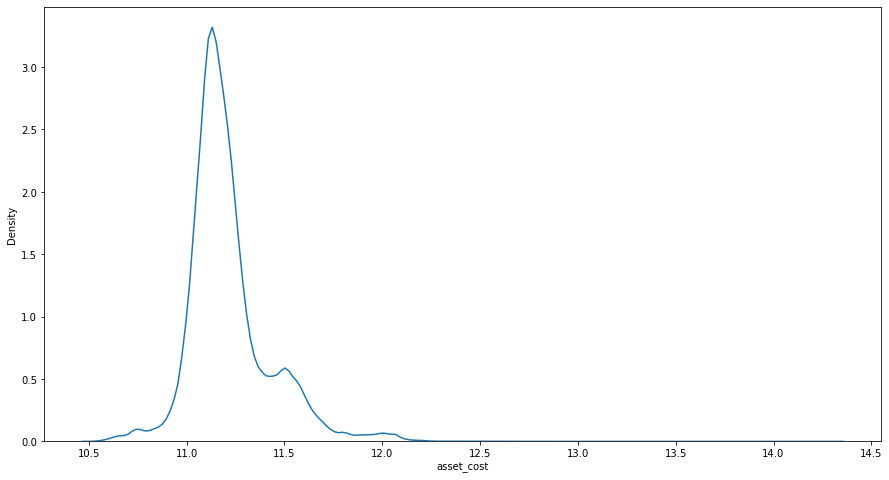

In [33]:
#Log Transformation
plt.figure(figsize=(15,8))
sns.distplot(np.log(df['asset_cost']),hist=False)

### Feature transformation on variables holding alphanumeric values

In [34]:
#Reducing the unique values
df[['PERFORM_CNS.SCORE.DESCRIPTION']].head()

,PERFORM_CNS.SCORE.DESCRIPTION
0,No Bureau History Available
1,I-Medium Risk
2,No Bureau History Available
3,L-Very High Risk
4,No Bureau History Available


In [35]:
#PERFORM_CNS.SCORE.DESCRIPTION
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts(normalize=True)*100

No Bureau History Available                               50.160
C-Very Low Risk                                            6.882
A-Very Low Risk                                            6.058
D-Very Low Risk                                            4.871
B-Very Low Risk                                            3.946
M-Very High Risk                                           3.764
F-Low Risk                                                 3.639
K-High Risk                                                3.550
H-Medium Risk                                              2.940
E-Low Risk                                                 2.497
I-Medium Risk                                              2.383
G-Low Risk                                                 1.710
Not Scored: Sufficient History Not Available               1.615
J-High Risk                                                1.608
Not Scored: Not Enough Info available on the customer      1.575
Not Scored: No Activity s

In [36]:
def split_data(var):
    score=var.split('-')
    if len(score)!=1:
        return score[0]
    else:
        return 'N'
    
def transform_cns_score_dec(data):
    data['PERFORM_CNS.SCORE.DESCRIPTION']=data['PERFORM_CNS.SCORE.DESCRIPTION'].apply(split_data)

In [37]:
transform_cns_score_dec(df)

In [38]:
df['PERFORM_CNS.SCORE.DESCRIPTION']=df['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'N':'Not Scored', 'A':'Very Low Risk',
                                                                                   'B':'Very Low Risk','C':'Very Low Risk',
                                                                                   'D':'Very Low Risk',
                                                                                   'E':'Low Risk',
                                                                                   'F':'Low Risk',
                                                                                   'G':'Low Risk',
                                                                                   'H':'Medium Risk', 'I':'Medium Risk',
                                                                                   'J':'High Risk', 'K':'High Risk',
                                                                                   'L':'Very High Risk', 'M':'Very High Risk'})

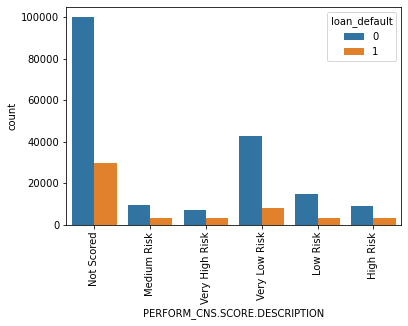

In [39]:
sns.countplot(df['PERFORM_CNS.SCORE.DESCRIPTION'],hue=df['loan_default'])
plt.xticks(rotation=90)
plt.show()

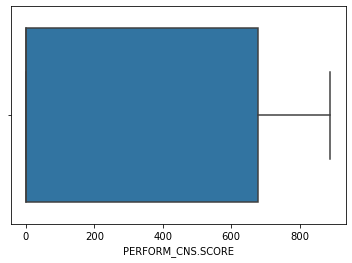

In [40]:
#PERFORM_CNS.SCORE
sns.boxplot(df['PERFORM_CNS.SCORE'])
plt.show()

<AxesSubplot:xlabel='loan_default', ylabel='PERFORM_CNS.SCORE'>

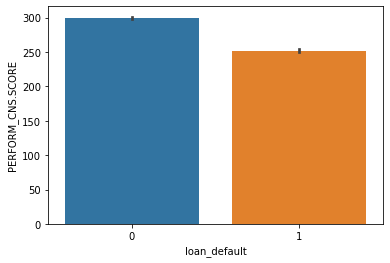

In [41]:
sns.barplot(y= df['PERFORM_CNS.SCORE'], x=df['loan_default'])

### Insight:
Customers with less PERFORM_CNS.SCORE are more prone to loan default

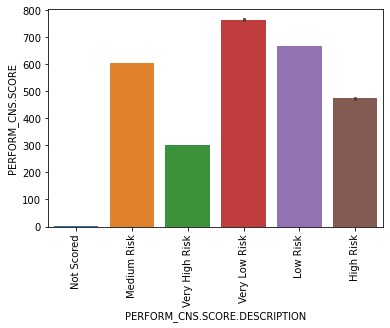

In [42]:
sns.barplot(df['PERFORM_CNS.SCORE.DESCRIPTION'],df['PERFORM_CNS.SCORE'])
plt.xticks(rotation=90)
plt.show()

We can infer from above plot that higher the risk lower is the PERFORM_CNS.SCORE

In [43]:
## Encoding state id
encoding = df.groupby('State_ID').size()
encoding = (encoding/len(df))*100
df['State_ID'] = df['State_ID'].map(encoding)
df['State_ID'].value_counts()

19.245    44870
14.616    34078
14.370    33505
7.670     17884
6.872     16022
6.089     14197
4.365     10177
4.038      9414
3.833      8936
2.911      6786
2.883      6721
2.321      5412
2.166      5049
1.806      4210
1.784      4160
1.712      3991
1.546      3605
1.152      2685
0.444      1035
0.079       185
0.067       156
0.033        76
Name: State_ID, dtype: int64

In [44]:
def new_feature(state_id_per):
    if (state_id_per >= 16.00):
        return 'High'
    if (state_id_per >= 14.00 and state_id_per < 16.00):
        return 'High-Medium'
    if (state_id_per >= 6.00 and state_id_per < 8.00):
        return 'Medium'
    if (state_id_per >= 3.00 and state_id_per < 5.00):
        return 'Medium-Low'
    if (state_id_per >= 0 and state_id_per < 3.00):
        return 'Low'

In [45]:
df['State_ID_cat'] = df['State_ID'].apply(new_feature)
df['State_ID_cat'].value_counts()

High-Medium    67583
Medium         48103
High           44870
Low            44071
Medium-Low     28527
Name: State_ID_cat, dtype: int64

In [46]:
df = df.drop('State_ID',1)

In [47]:
#AVERAGE_ACCT_AGE & CREDIT_HISTORY_LENGTH
df[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].head()

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon


In [48]:
#Now we have 2 Columns named "AVERAGE_ACCT_AGE" & "CREDIT_HISTORY_LENGTH".
#They have AplhNumeric Values Lets change them to Months

def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

def months_transformation(data):
    data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(change_col_month)
    data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(change_col_month)

In [49]:
months_transformation(df)

In [50]:
df[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].head()

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0,0
1,23,23
2,0,0
3,8,15
4,0,0


In [51]:
num_temp = df[['PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS', 
        'PRI.OVERDUE.ACCTS',  'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH', 'SEC.NO.OF.ACCTS',
        'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]

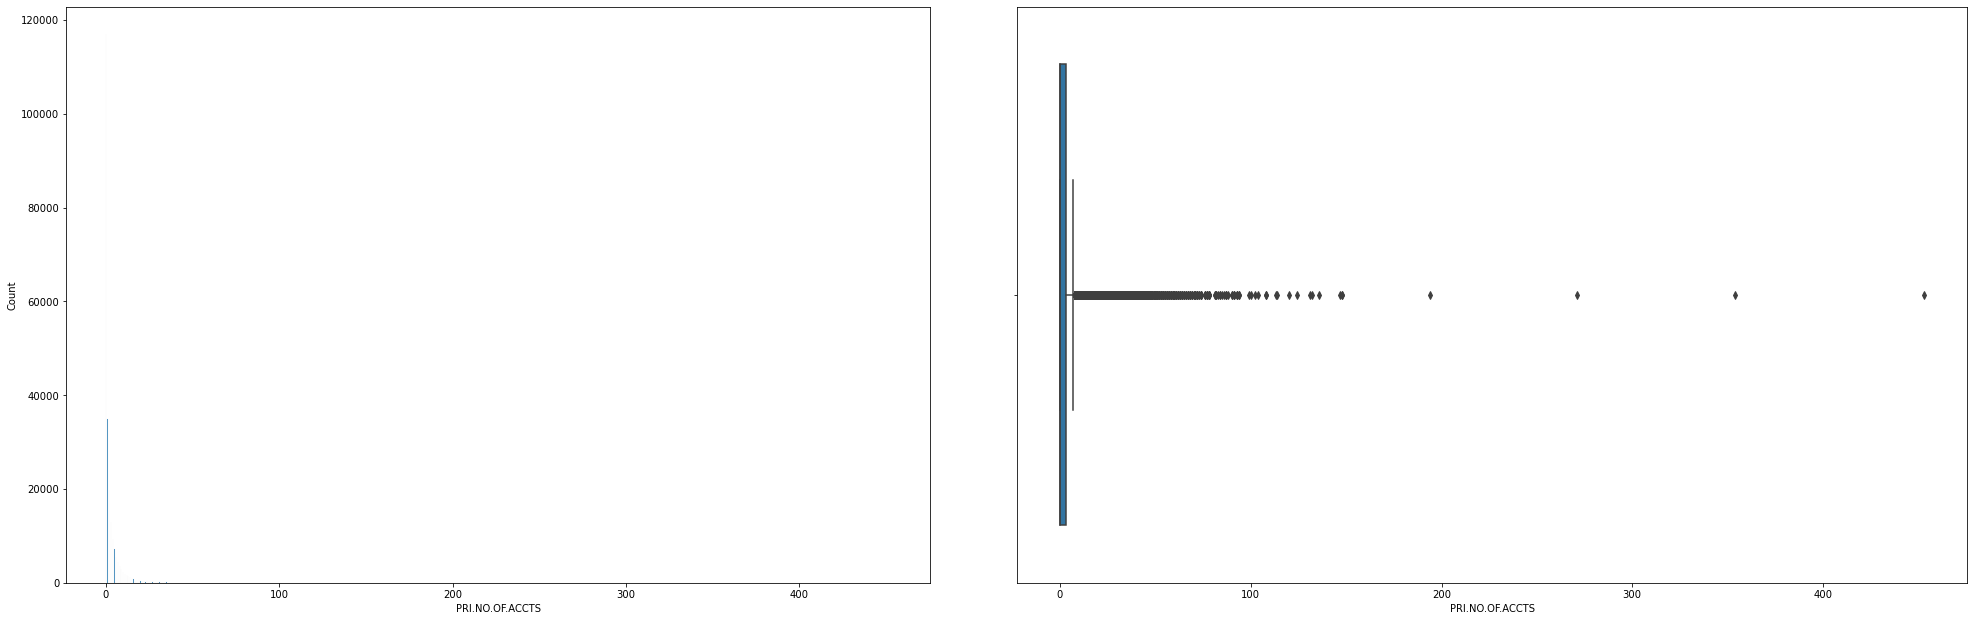

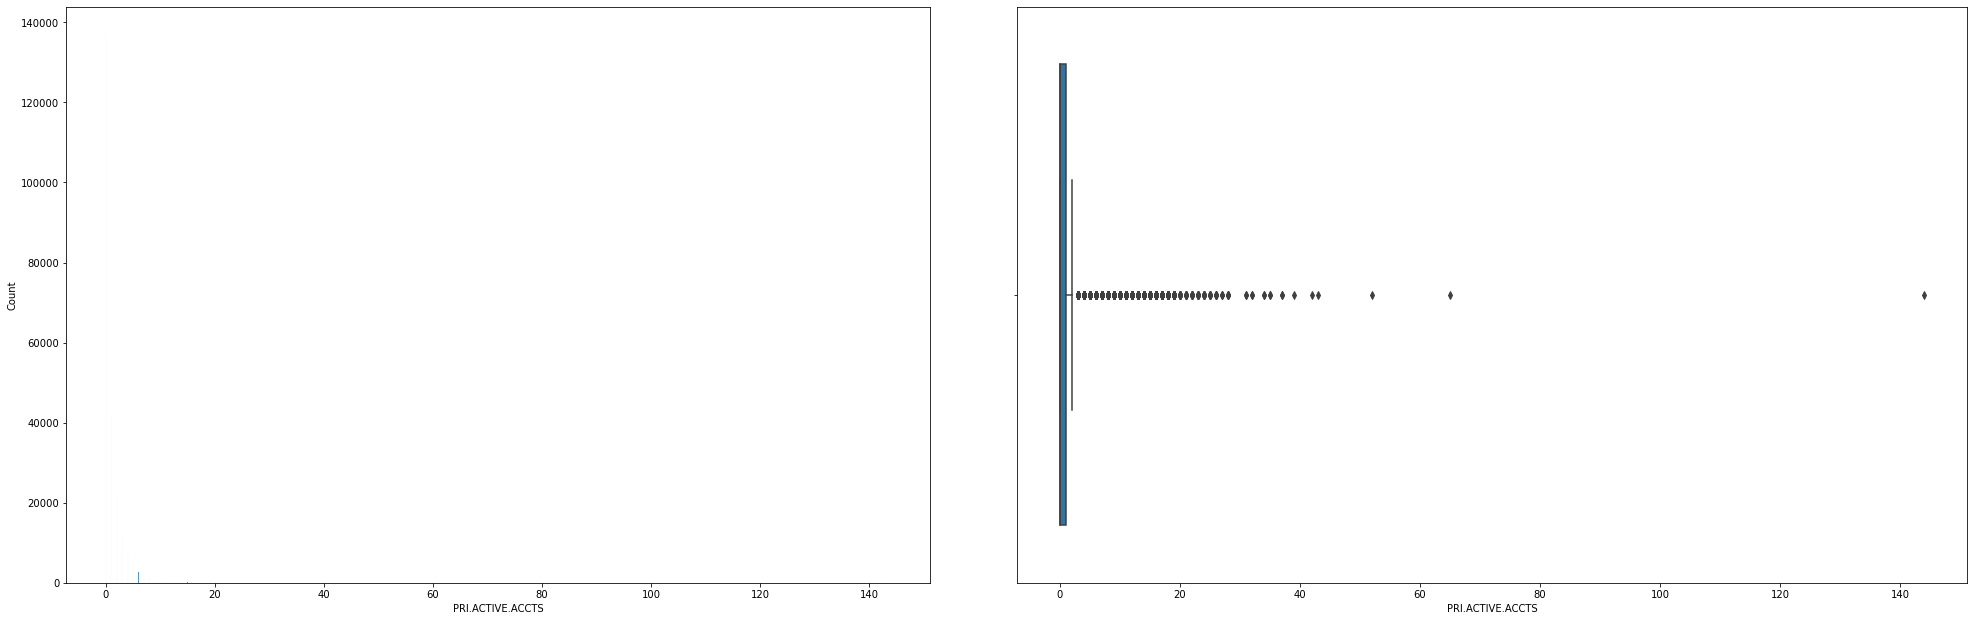

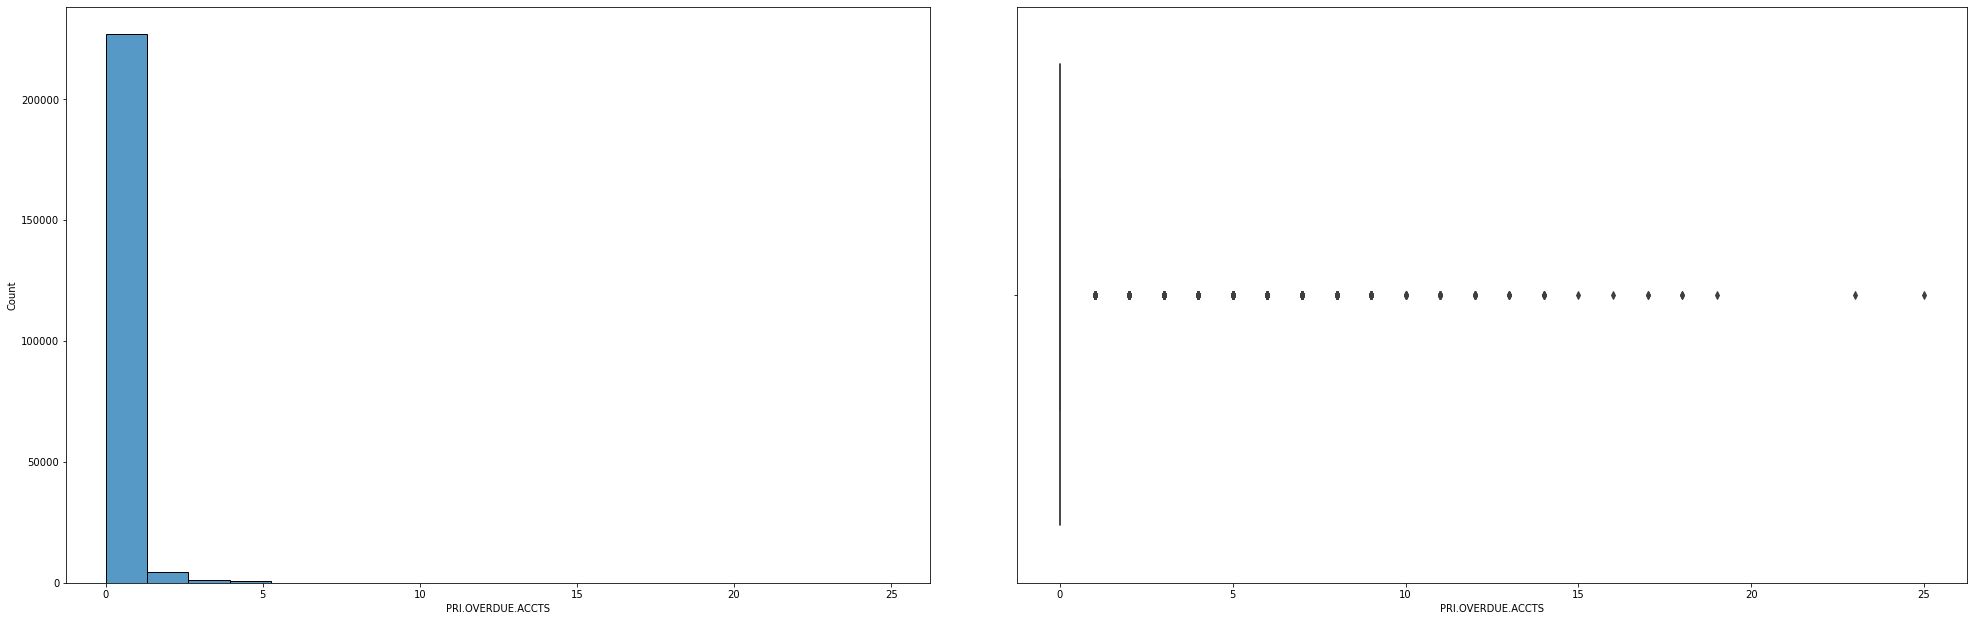

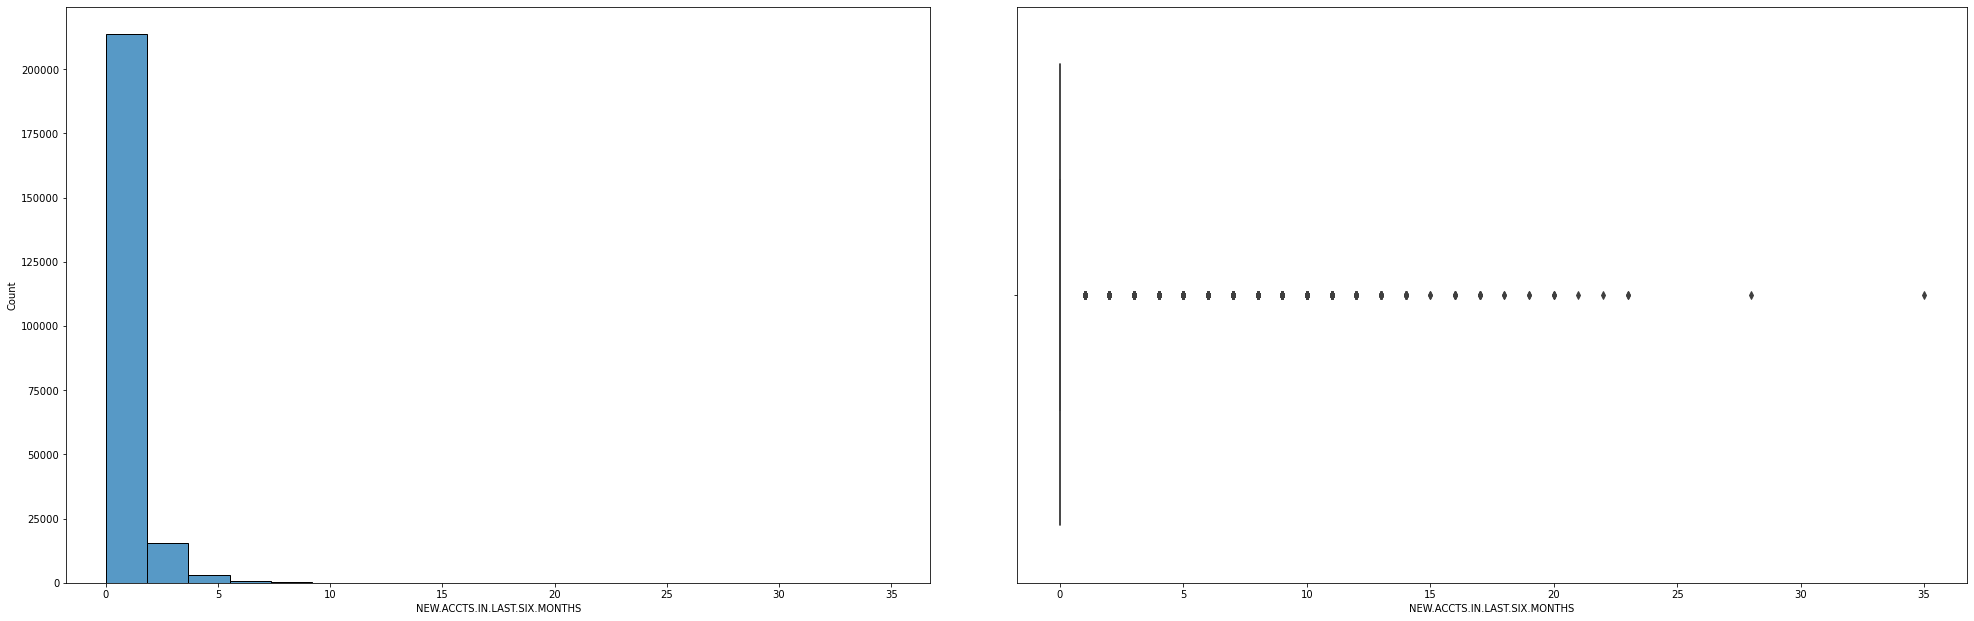

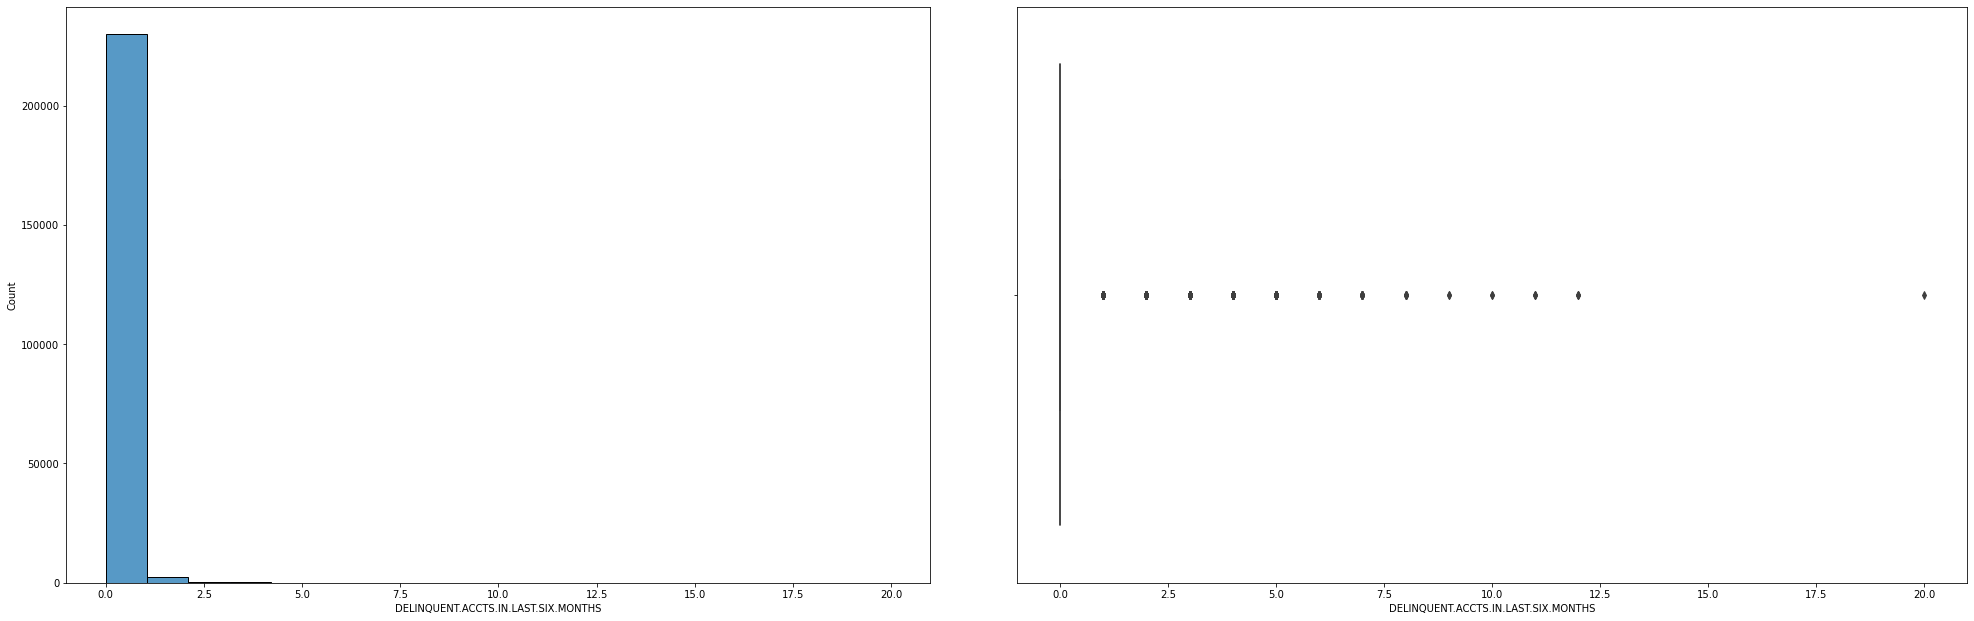

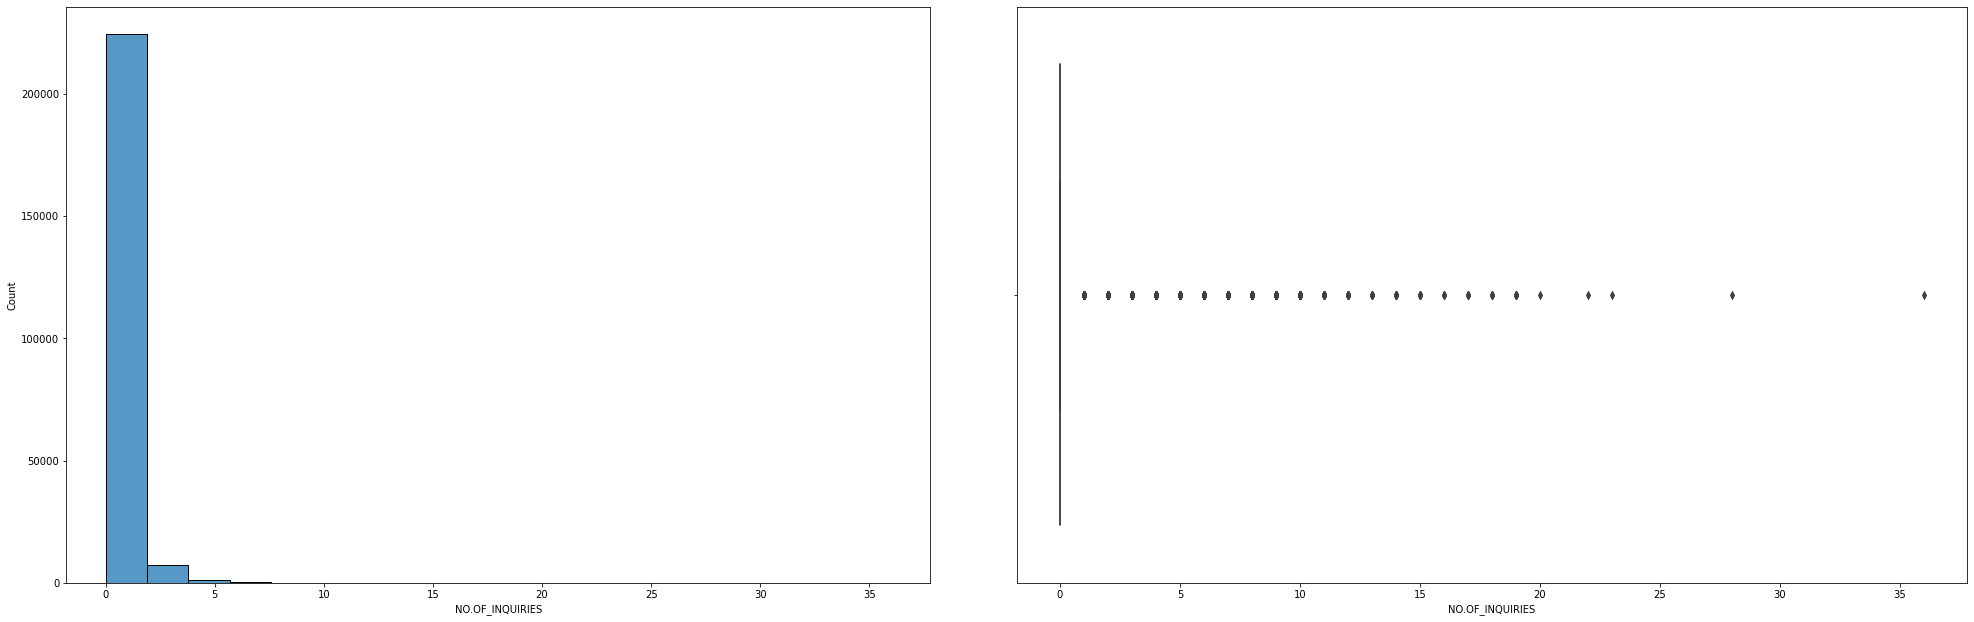

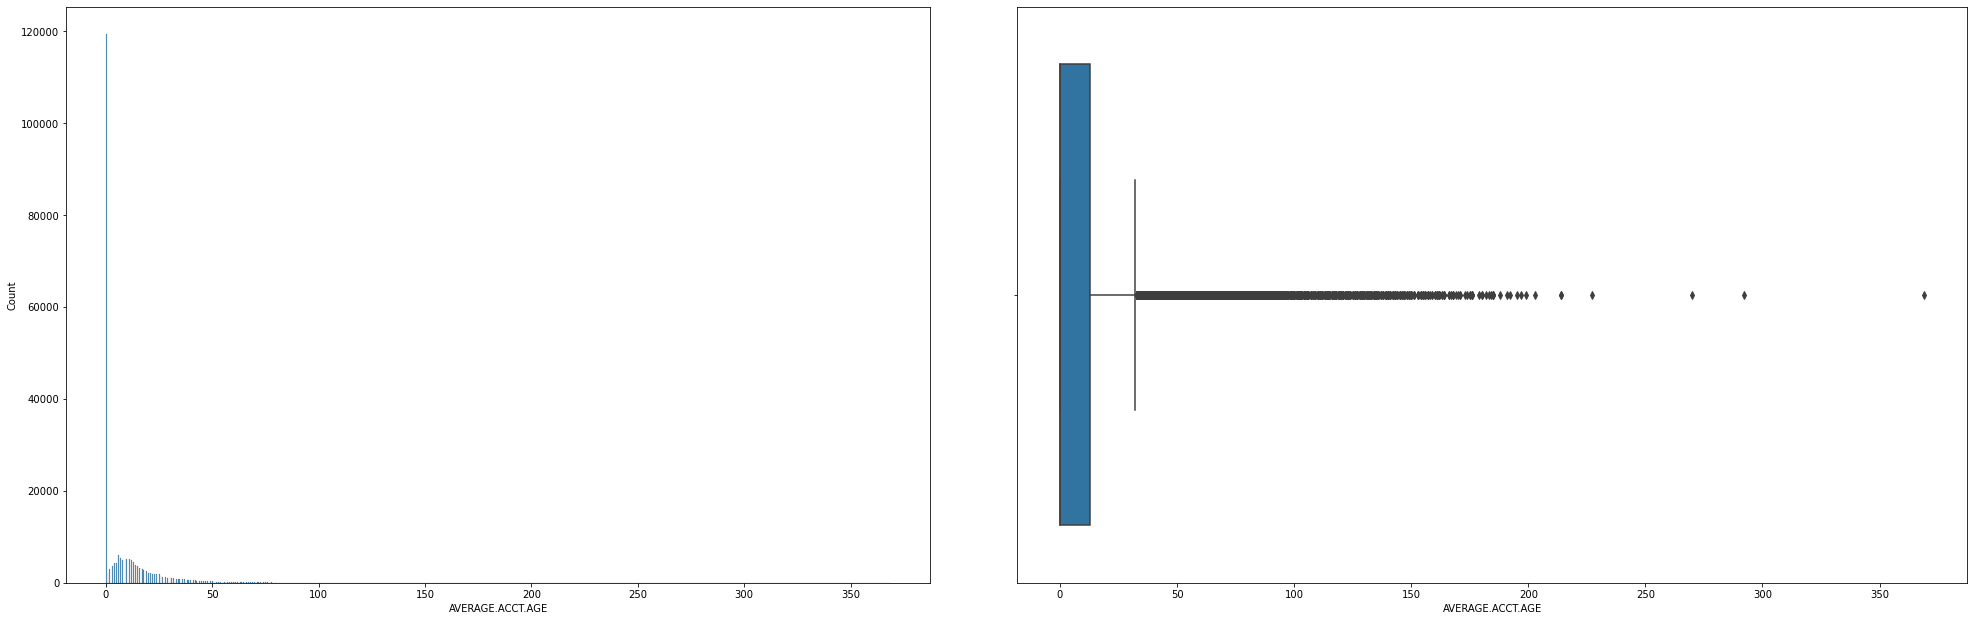

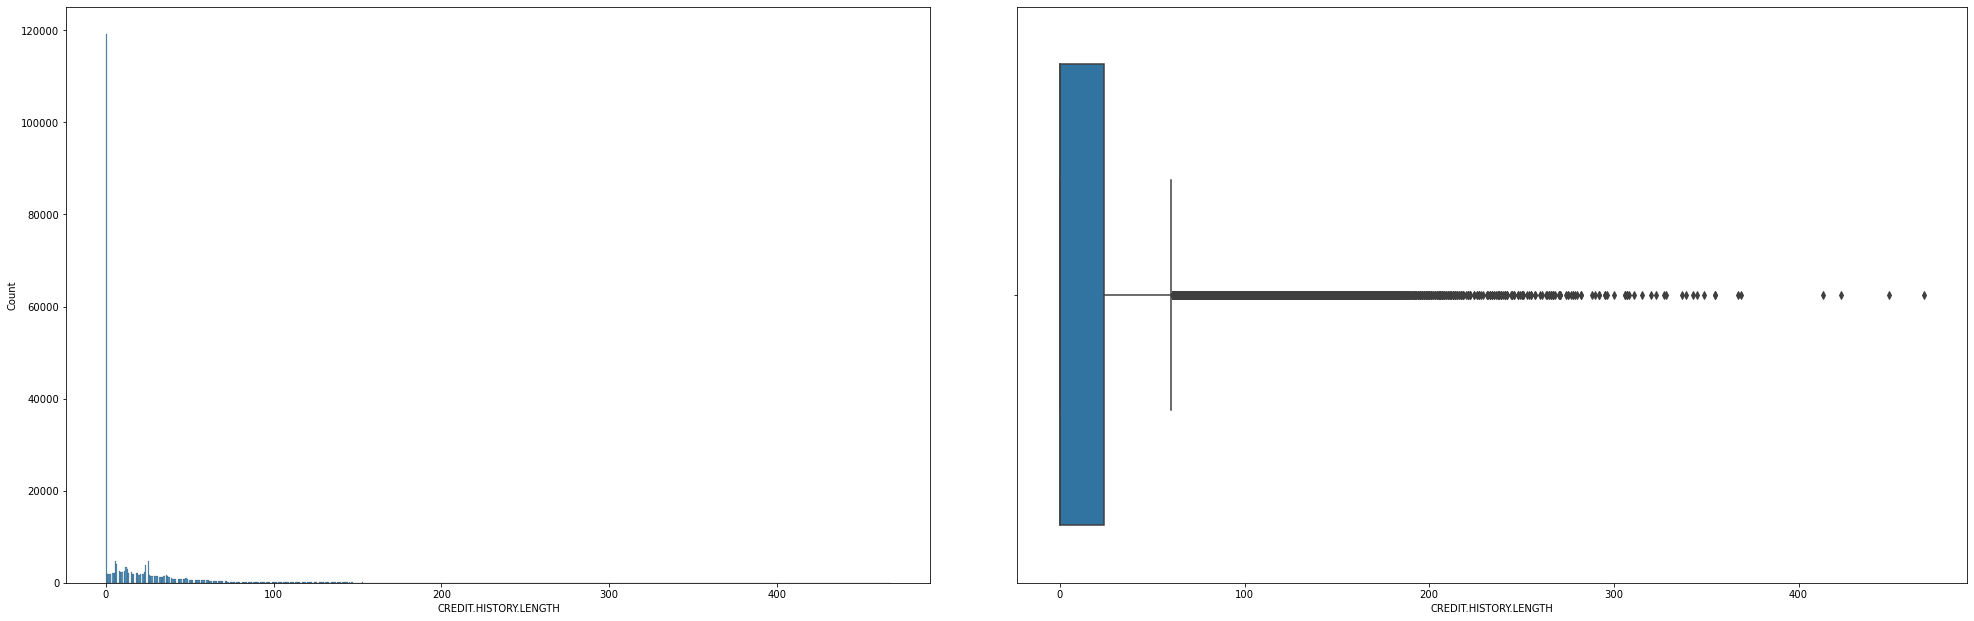

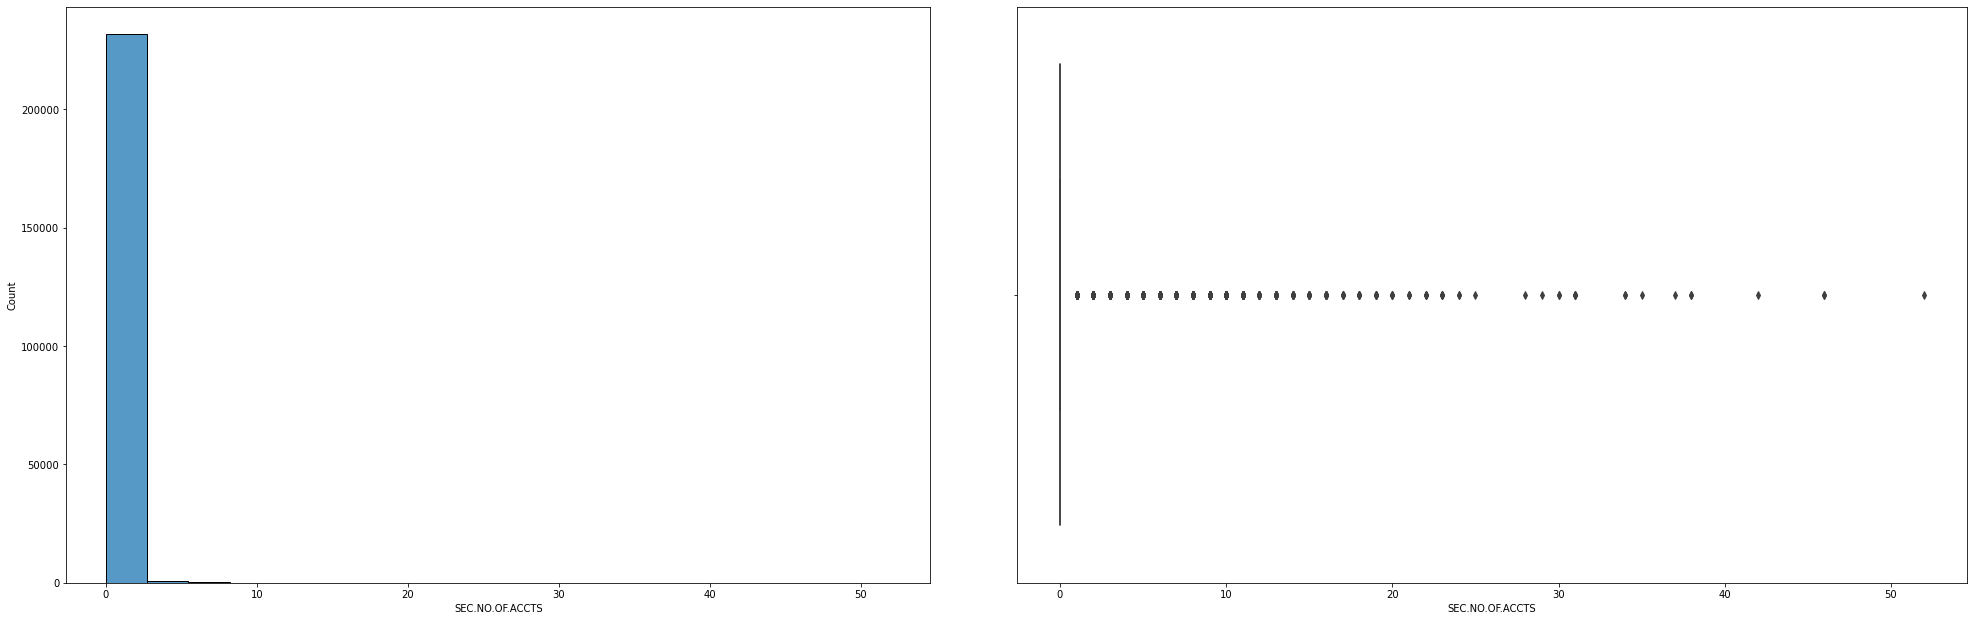

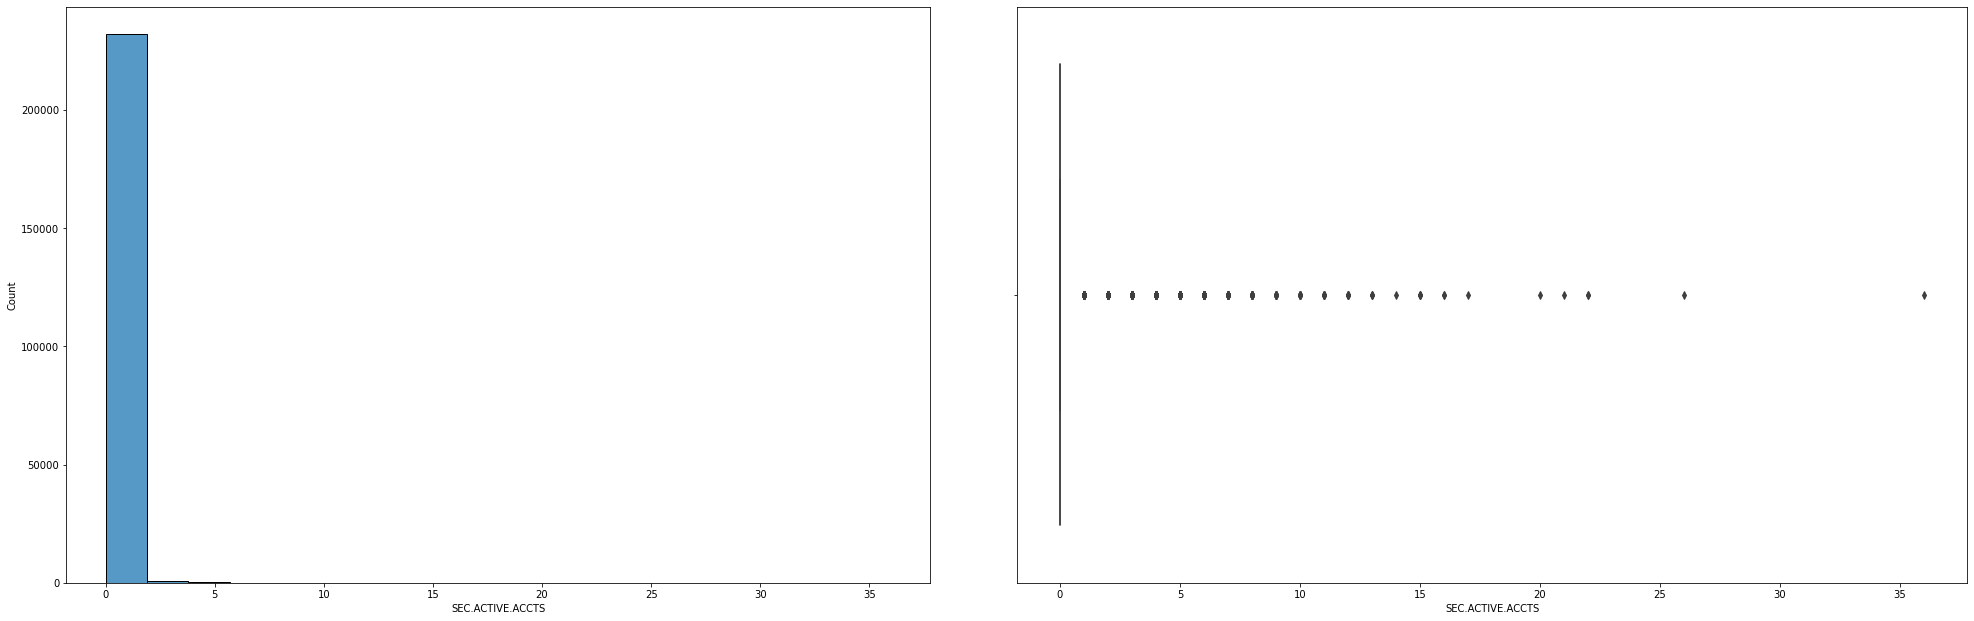

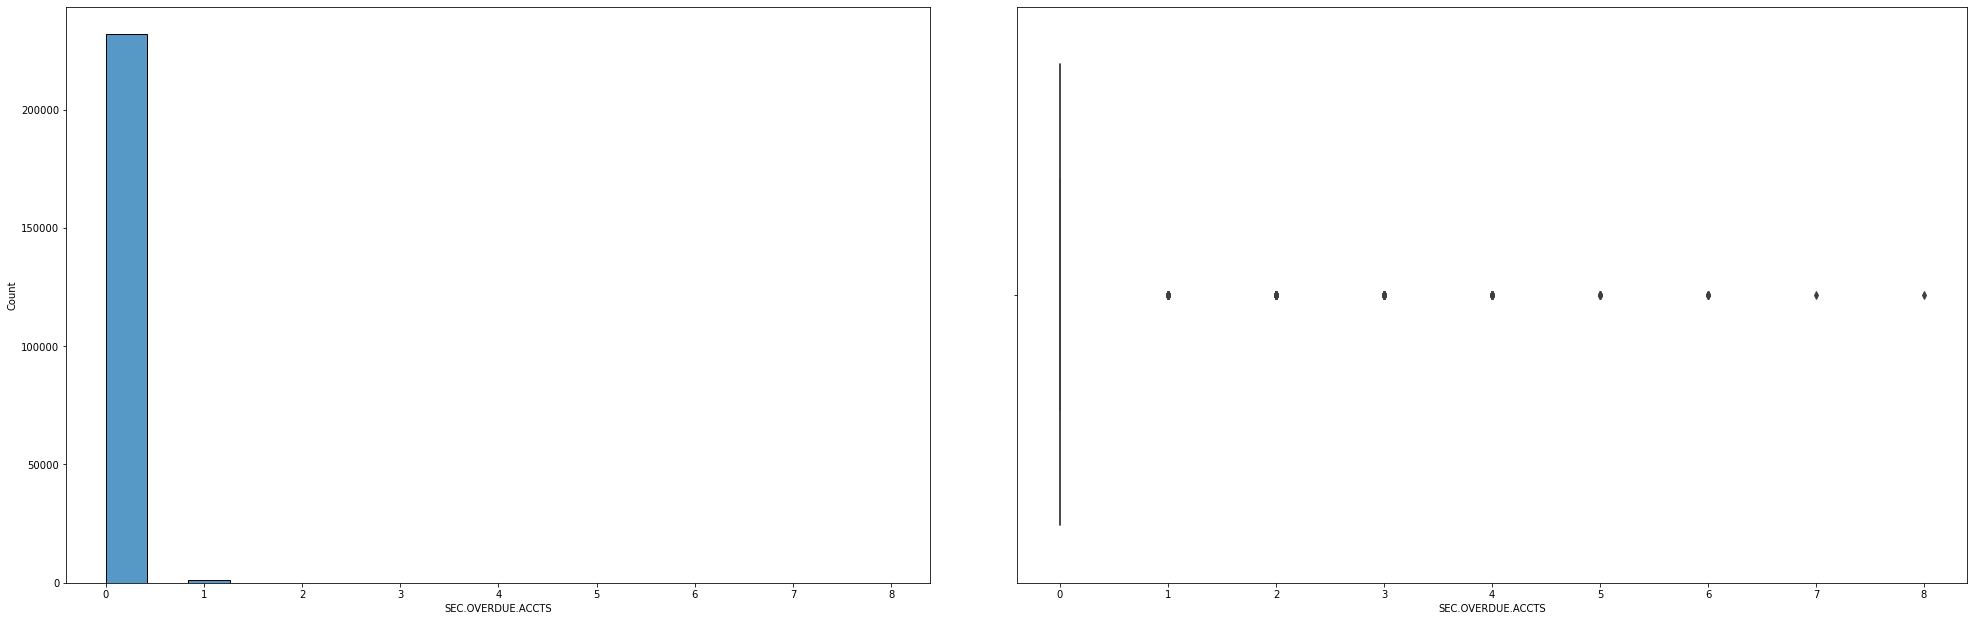

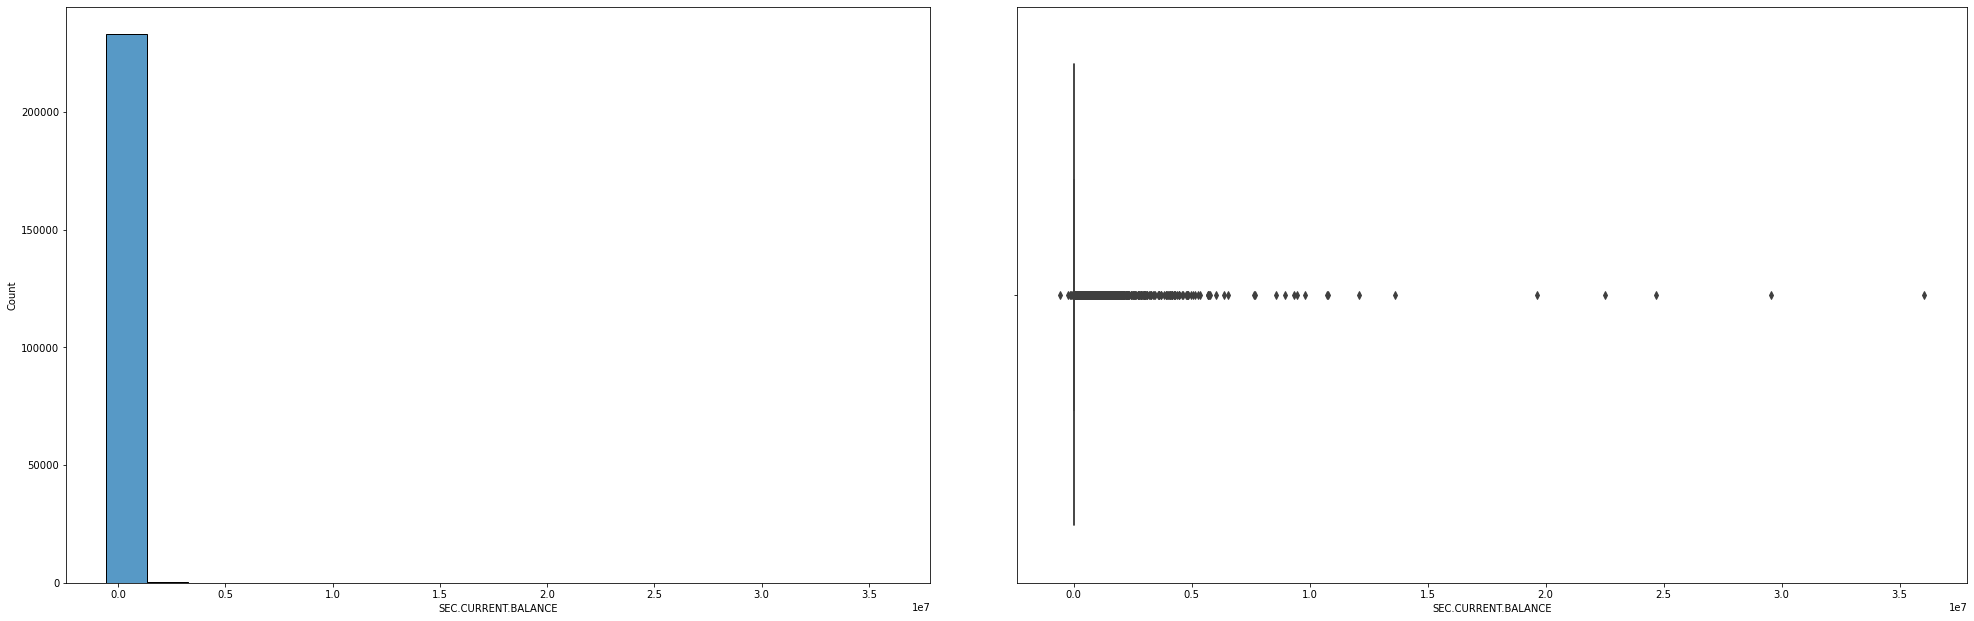

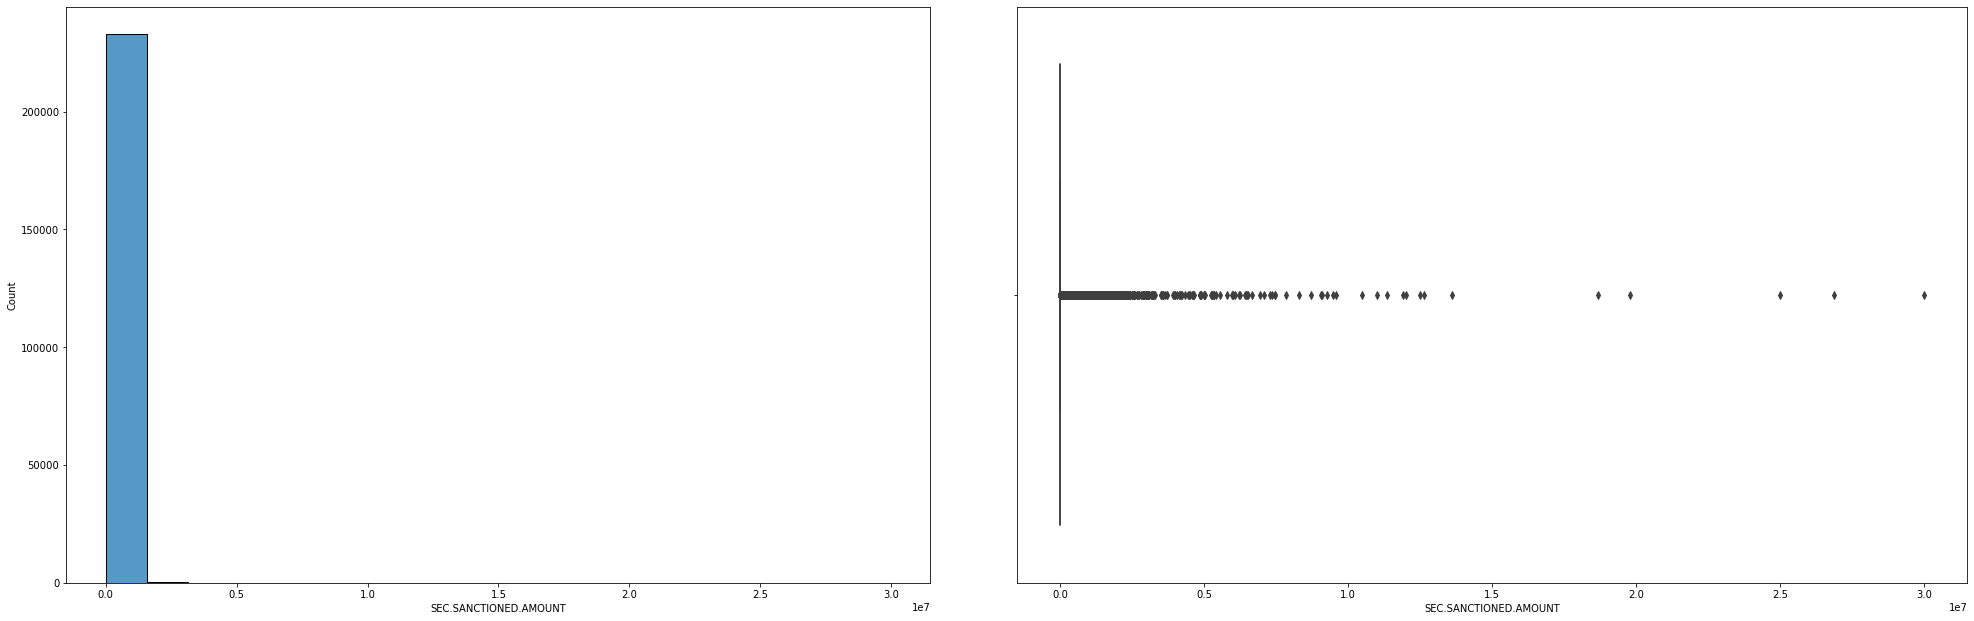

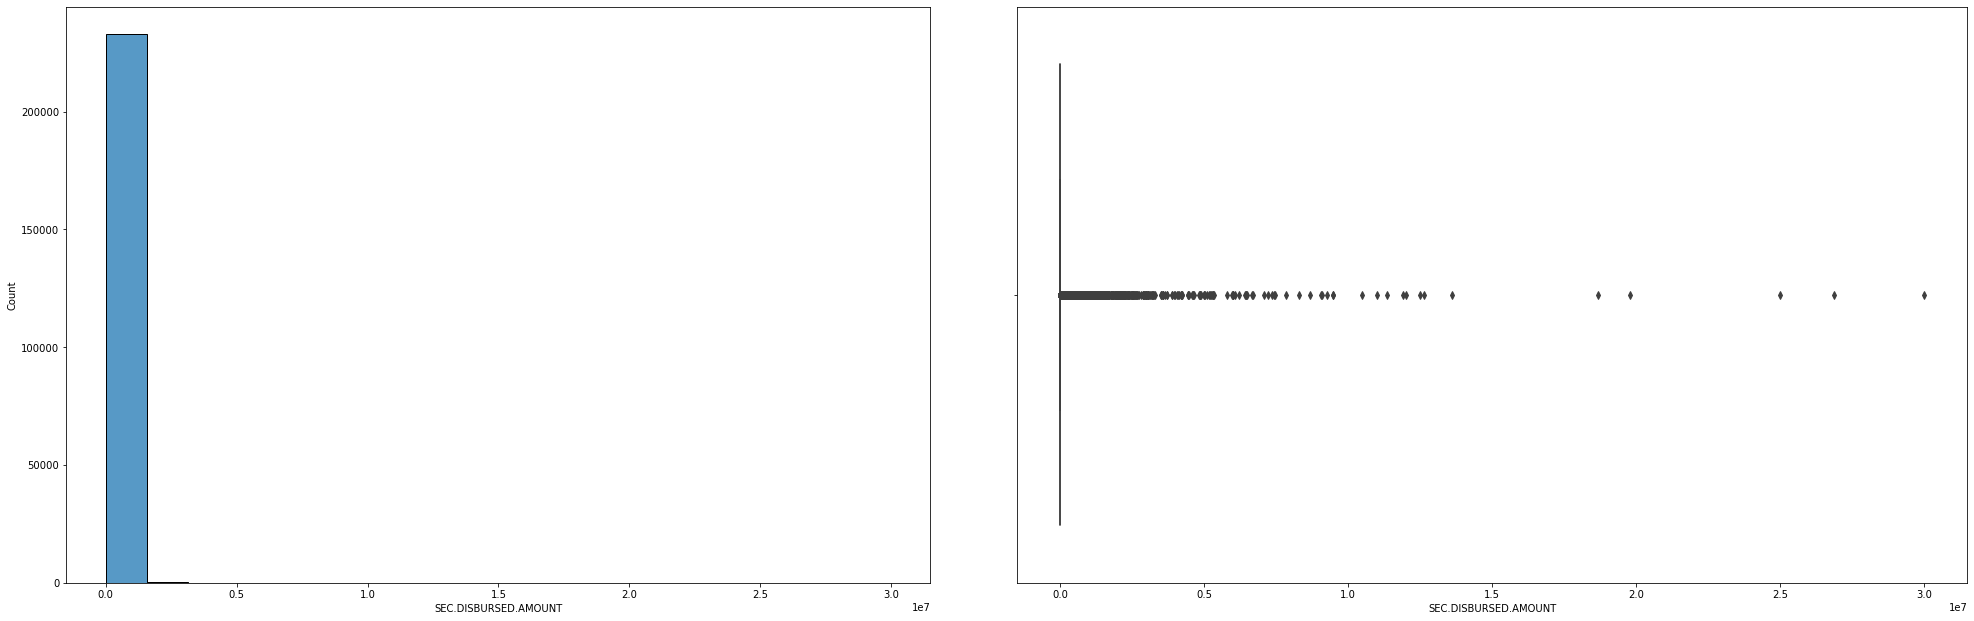

In [52]:
for i in (num_temp):
    figure= plt.figure()
    
    axes1 = figure.add_axes([0, 0, 2, 2]) 
    axes2 = figure.add_axes([2.2, 0, 2.2, 2])
    
    sns.histplot(df[i],ax=axes1)
    sns.boxplot(df[i],ax=axes2)
    plt.show()

In [53]:
#Testing the skewness in the dataset:
df.loc[:,['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS', 
        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
        'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'loan_default','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].skew()

PERFORM_CNS.SCORE                       0.445
PRI.NO.OF.ACCTS                         9.745
PRI.ACTIVE.ACCTS                        5.372
PRI.OVERDUE.ACCTS                       7.513
PRI.CURRENT.BALANCE                    29.426
PRI.SANCTIONED.AMOUNT                 323.697
PRI.DISBURSED.AMOUNT                  322.541
SEC.NO.OF.ACCTS                        27.986
SEC.ACTIVE.ACCTS                       30.600
SEC.OVERDUE.ACCTS                      24.129
SEC.CURRENT.BALANCE                   108.506
SEC.SANCTIONED.AMOUNT                  75.255
SEC.DISBURSED.AMOUNT                   75.764
PRIMARY.INSTAL.AMT                     69.916
SEC.INSTAL.AMT                        153.806
NEW.ACCTS.IN.LAST.SIX.MONTHS            4.839
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     6.642
NO.OF_INQUIRIES                         7.871
loan_default                            1.373
AVERAGE.ACCT.AGE                        3.285
CREDIT.HISTORY.LENGTH                   2.969
dtype: float64

In [54]:
#Transforming the columns with square root transformation as more of zero's are present.

for i in num_temp:
    df[i]=np.sqrt((df[i]))


In [55]:
df.head()

,disbursed_amount,asset_cost,ltv,supplier_id,manufacturer_id,Date.of.Birth,Employment.Type,DisbursalDate,Employee_code_ID,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,State_ID_cat
0,50578,58400,662254.268,22807,45,01-01-84,Salaried,03-08-18,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0,High-Medium
1,47145,65550,344821.243,22807,45,31-07-85,Self employed,26-09-18,1998,598,Medium Risk,1.000,1.000,1.000,27600,50200,50200,0.000,0.000,0.000,0.000,0.000,0.000,1991,0,0.000,1.000,4.796,4.796,0.000,1,High-Medium
2,53278,61360,664175.308,22807,45,24-08-85,Self employed,01-08-18,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0,High-Medium
3,57513,66113,636928.478,22807,45,30-12-93,Self employed,26-10-18,1998,305,Very High Risk,1.732,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,31,0,0.000,0.000,2.828,3.873,1.000,1,High-Medium
4,52378,60300,634829.324,22807,45,09-12-77,Self employed,26-09-18,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,1.000,1,High-Medium


In [56]:
#Testing the skewness in the dataset:
df.loc[:,['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS', 
        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
        'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'loan_default','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].skew()

PERFORM_CNS.SCORE                       0.445
PRI.NO.OF.ACCTS                         1.438
PRI.ACTIVE.ACCTS                        1.137
PRI.OVERDUE.ACCTS                       2.945
PRI.CURRENT.BALANCE                    29.426
PRI.SANCTIONED.AMOUNT                 323.697
PRI.DISBURSED.AMOUNT                  322.541
SEC.NO.OF.ACCTS                         9.058
SEC.ACTIVE.ACCTS                        9.963
SEC.OVERDUE.ACCTS                      14.509
SEC.CURRENT.BALANCE                    24.782
SEC.SANCTIONED.AMOUNT                  20.552
SEC.DISBURSED.AMOUNT                   20.851
PRIMARY.INSTAL.AMT                     69.916
SEC.INSTAL.AMT                        153.806
NEW.ACCTS.IN.LAST.SIX.MONTHS            1.888
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     3.495
NO.OF_INQUIRIES                         2.800
loan_default                            1.373
AVERAGE.ACCT.AGE                        0.955
CREDIT.HISTORY.LENGTH                   1.058
dtype: float64

In [57]:
#We can observe that skewness has reduced after performing Sqrt Transformation

In [58]:
bar_p = df[['PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS', 
        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
        'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES']]

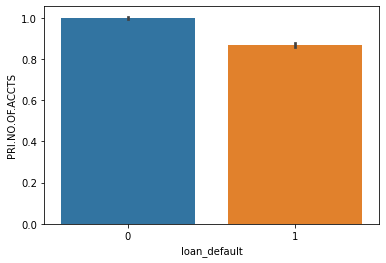

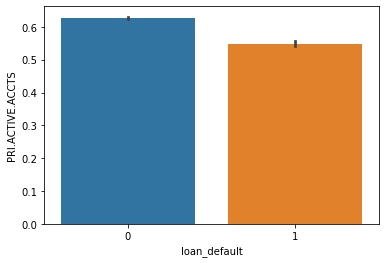

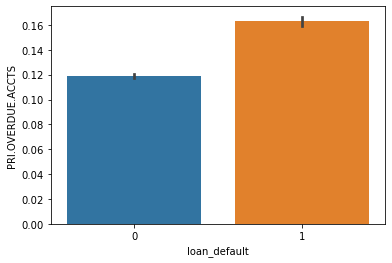

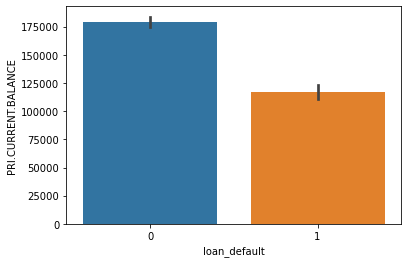

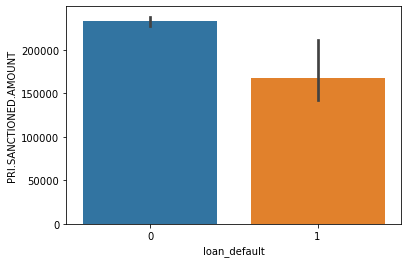

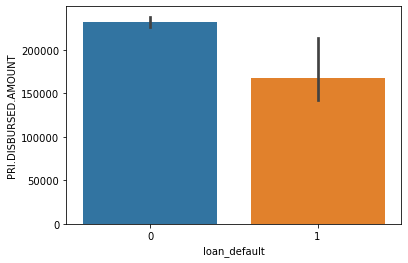

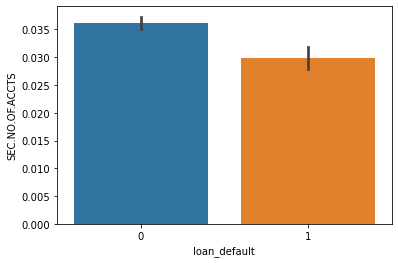

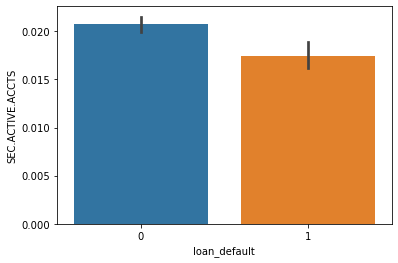

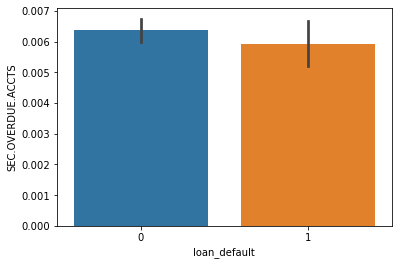

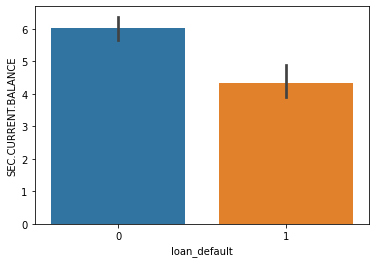

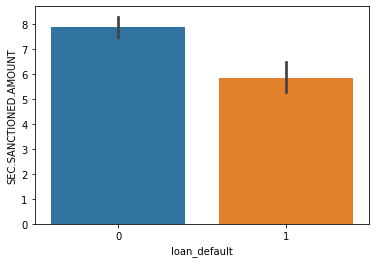

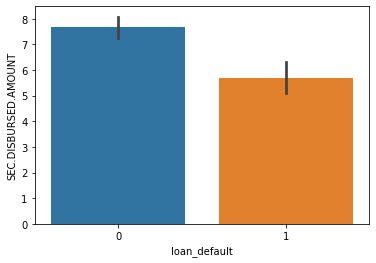

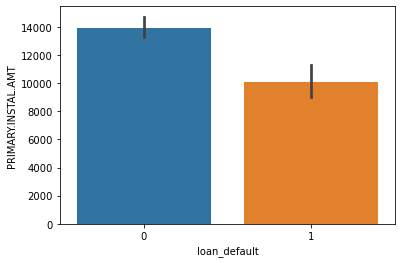

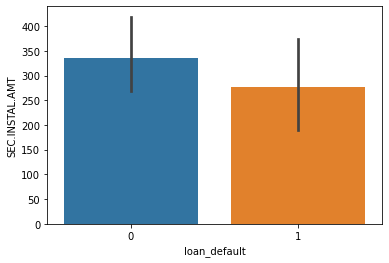

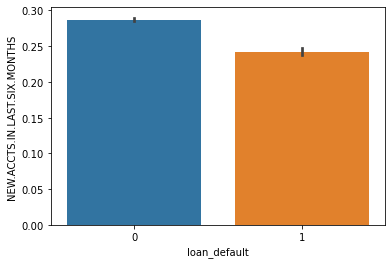

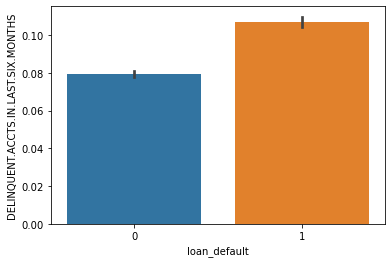

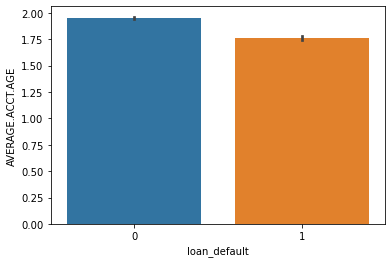

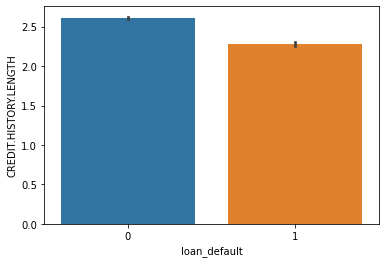

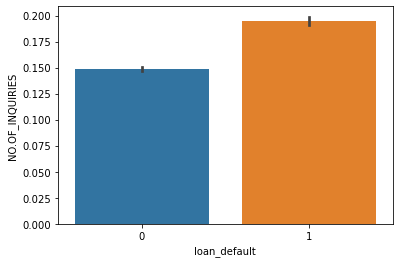

In [59]:
for i in (bar_p):
    sns.barplot(y= df[i], x=df['loan_default'])
    plt.show()

#### Insights

Customers having more credits in the following - PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE, PRI.SANCTIONED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT, PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH  are less prone to loan default.

Customers having more PRI.OVERDUE.ACCTS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES are more prone to loan default

In [60]:
### Feature transformations on Date of birth

In [61]:
df['Date.of.Birth'].head()

0    01-01-84
1    31-07-85
2    24-08-85
3    30-12-93
4    09-12-77
Name: Date.of.Birth, dtype: object

In [62]:
df['Date.of.Birth'].apply(lambda x:x.split('-')[2])
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'])
def date_feature(x):
    if x.year >= 1949 and x.year < 1959:
        return '60-70'
    elif x.year >= 1959 and x.year < 1969:
        return '50-60'
    elif x.year >= 1969 and x.year < 1979:
        return '40-50'
    elif x.year >= 1979 and x.year < 1989:
        return '30-40'
    elif x.year >= 1989 and x.year <= 2000:
        return '20-30'
df['Age']=df['Date.of.Birth'].apply(date_feature)

In [63]:
df = df.drop(['Date.of.Birth'],axis=1)
df['Age'].value_counts()

20-30    92039
30-40    74447
40-50    39592
Name: Age, dtype: int64

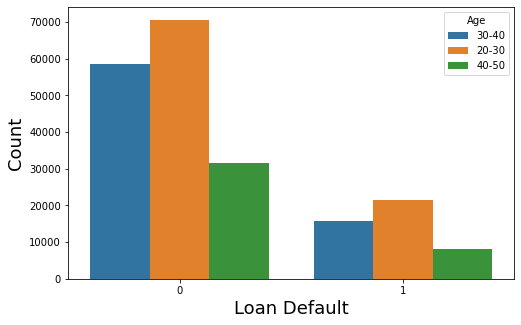

In [64]:
#Relationship between Age and target column
plt.figure(figsize=(8,5))
sns.countplot(df['loan_default'], hue = df['Age'])
plt.xlabel('Loan Default', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

In [65]:
## Disbursal Date
df['Disbursal_year'] = df['DisbursalDate'].apply(lambda x:x.split('-')[2])
df['Disbursal_year'].value_counts()

18    233154
Name: Disbursal_year, dtype: int64

In [66]:
df = df.drop(['DisbursalDate','Disbursal_year'],axis=1)

All the loans were disbursed in the year 2018, Hence this can be also dropped.

In [67]:
df.head()

,disbursed_amount,asset_cost,ltv,supplier_id,manufacturer_id,Employment.Type,Employee_code_ID,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,State_ID_cat,Age
0,50578,58400,662254.268,22807,45,Salaried,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0,High-Medium,30-40
1,47145,65550,344821.243,22807,45,Self employed,1998,598,Medium Risk,1.000,1.000,1.000,27600,50200,50200,0.000,0.000,0.000,0.000,0.000,0.000,1991,0,0.000,1.000,4.796,4.796,0.000,1,High-Medium,30-40
2,53278,61360,664175.308,22807,45,Self employed,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0,High-Medium,30-40
3,57513,66113,636928.478,22807,45,Self employed,1998,305,Very High Risk,1.732,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,31,0,0.000,0.000,2.828,3.873,1.000,1,High-Medium,20-30
4,52378,60300,634829.324,22807,45,Self employed,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,1.000,1,High-Medium,40-50


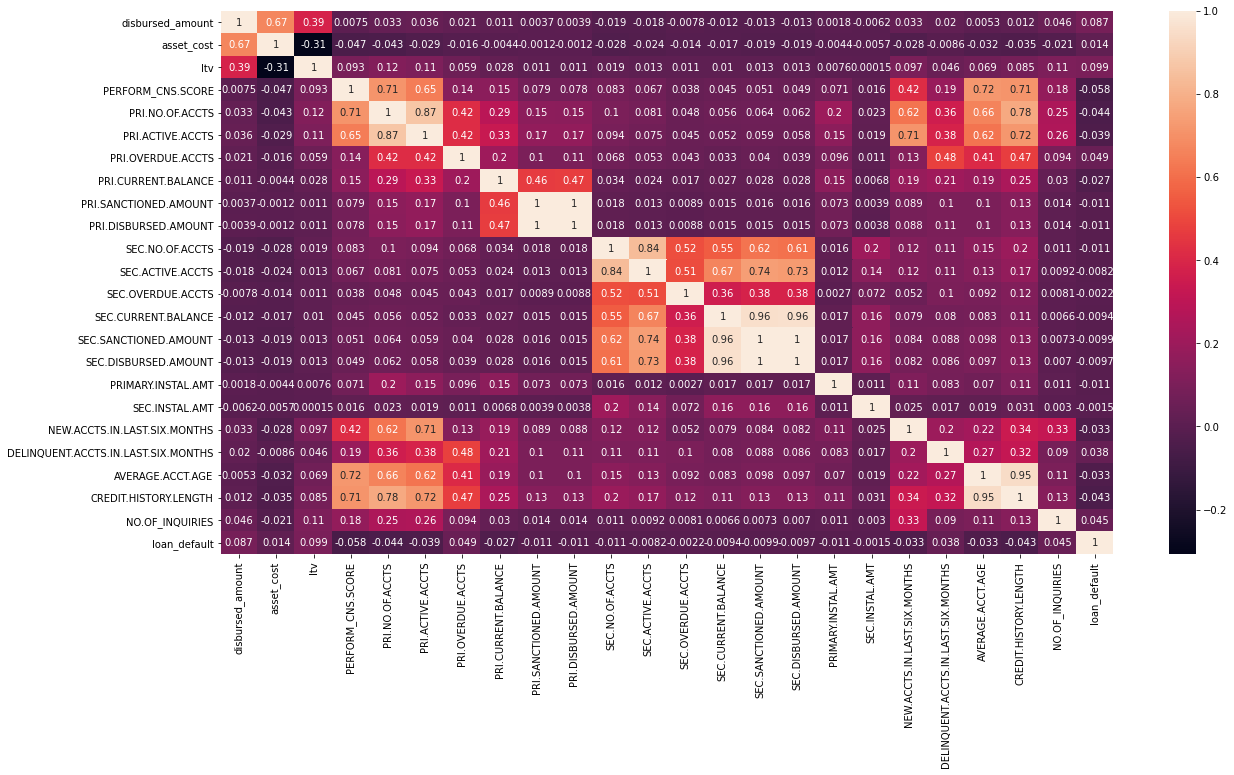

In [68]:
df_corr = df.drop(['supplier_id', 'manufacturer_id','Employee_code_ID','Employment.Type'],1)
corr = df_corr.corr()
plt.figure(figsize=(20,10))   #initialising the figure size
sns.heatmap(corr,annot=True)  #plotting the heat map to determine correlation
plt.show()

In [69]:
### Feauture Selection

In [70]:
df.isna().sum()

disbursed_amount                           0
asset_cost                                 0
ltv                                        0
supplier_id                                0
manufacturer_id                            0
Employment.Type                            0
Employee_code_ID                           0
PERFORM_CNS.SCORE                          0
PERFORM_CNS.SCORE.DESCRIPTION              0
PRI.NO.OF.ACCTS                            0
PRI.ACTIVE.ACCTS                           0
PRI.OVERDUE.ACCTS                          0
PRI.CURRENT.BALANCE                        0
PRI.SANCTIONED.AMOUNT                      0
PRI.DISBURSED.AMOUNT                       0
SEC.NO.OF.ACCTS                            0
SEC.ACTIVE.ACCTS                           0
SEC.OVERDUE.ACCTS                          0
SEC.CURRENT.BALANCE                       61
SEC.SANCTIONED.AMOUNT                      0
SEC.DISBURSED.AMOUNT                       0
PRIMARY.INSTAL.AMT                         0
SEC.INSTAL

In [71]:
df.dropna(inplace=True)
df.isna().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
supplier_id                            0
manufacturer_id                        0
Employment.Type                        0
Employee_code_ID                       0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT                         0
NEW.ACCTS.IN.LAST.SIX.MONTHS           0
DELINQUENT.ACCTS

In [72]:
## T-test for Continuous Variables
df.head()

,disbursed_amount,asset_cost,ltv,supplier_id,manufacturer_id,Employment.Type,Employee_code_ID,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,State_ID_cat,Age
0,50578,58400,662254.268,22807,45,Salaried,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0,High-Medium,30-40
1,47145,65550,344821.243,22807,45,Self employed,1998,598,Medium Risk,1.000,1.000,1.000,27600,50200,50200,0.000,0.000,0.000,0.000,0.000,0.000,1991,0,0.000,1.000,4.796,4.796,0.000,1,High-Medium,30-40
2,53278,61360,664175.308,22807,45,Self employed,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0,High-Medium,30-40
3,57513,66113,636928.478,22807,45,Self employed,1998,305,Very High Risk,1.732,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,31,0,0.000,0.000,2.828,3.873,1.000,1,High-Medium,20-30
4,52378,60300,634829.324,22807,45,Self employed,1998,0,Not Scored,0.000,0.000,0.000,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,1.000,1,High-Medium,40-50


In [73]:
from scipy.stats import ttest_ind

In [74]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric = df_numeric.drop('loan_default',1)
df_numeric = df_numeric.drop('Employee_code_ID',1)

In [75]:
df_numeric = df_numeric.drop(['supplier_id',
       'manufacturer_id'],1)

In [76]:
df_numeric.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [77]:
#Conducting t-test to check the palue of the numercal features:
for i in df_numeric.columns:
    a = df[df['loan_default'] ==0][i]
    b = df[df['loan_default'] ==1][i]
    stat,p = ttest_ind(a,b)
    if p < 0.05:
        print('Column',i,'is a significant feature')
        print('Pvalue',p)
        print('\n')
    else:
        print('Column',i,'is NOT significant feature')
        print('Pvalue',p)
        print('\n')

Column disbursed_amount is a significant feature
Pvalue 0.0


Column asset_cost is a significant feature
Pvalue 8.890175057082184e-09


Column ltv is a significant feature
Pvalue 0.0


Column PERFORM_CNS.SCORE is a significant feature
Pvalue 1.3104635686645443e-126


Column PRI.NO.OF.ACCTS is a significant feature
Pvalue 4.072376171834445e-77


Column PRI.ACTIVE.ACCTS is a significant feature
Pvalue 3.2950998578381573e-65


Column PRI.OVERDUE.ACCTS is a significant feature
Pvalue 1.0154319525893955e-103


Column PRI.CURRENT.BALANCE is a significant feature
Pvalue 1.6381826931018193e-33


Column PRI.SANCTIONED.AMOUNT is a significant feature
Pvalue 1.1104129487418895e-39


Column PRI.DISBURSED.AMOUNT is a significant feature
Pvalue 1.898676525591614e-38


Column SEC.NO.OF.ACCTS is a significant feature
Pvalue 9.870781383411645e-05


Column SEC.ACTIVE.ACCTS is a significant feature
Pvalue 0.004307050490913547


Column SEC.OVERDUE.ACCTS is NOT significant feature
Pvalue 0.53643411317686



In [78]:
#Dropping the insignificant features
df_numeric = df_numeric.drop(['SEC.OVERDUE.ACCTS'],1)
df_numeric.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

### VIF for Numeric Variables

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = df_numeric.columns

vif['VIF'] = [variance_inflation_factor(df_numeric.values,i) for i in range(df_numeric.shape[1])]

vif

,Features,VIF
0,disbursed_amount,142.474
1,asset_cost,73.347
2,ltv,20.292
3,PERFORM_CNS.SCORE,5.817
4,PRI.NO.OF.ACCTS,10.830
5,PRI.ACTIVE.ACCTS,9.745
6,PRI.OVERDUE.ACCTS,1.967
7,PRI.CURRENT.BALANCE,12.810
8,PRI.SANCTIONED.AMOUNT,85.189
9,PRI.DISBURSED.AMOUNT,102.744


In [80]:
df_new_1 = df_numeric.drop(['PRI.DISBURSED.AMOUNT','SEC.DISBURSED.AMOUNT','SEC.SANCTIONED.AMOUNT'],1)

vif = pd.DataFrame()

vif['Features'] = df_new_1.columns

vif['VIF'] = [variance_inflation_factor(df_new_1.values,i) for i in range(df_new_1.shape[1])]

vif

,Features,VIF
0,disbursed_amount,142.473
1,asset_cost,73.346
2,ltv,20.292
3,PERFORM_CNS.SCORE,5.815
4,PRI.NO.OF.ACCTS,10.830
5,PRI.ACTIVE.ACCTS,9.743
6,PRI.OVERDUE.ACCTS,1.967
7,PRI.CURRENT.BALANCE,10.489
8,PRI.SANCTIONED.AMOUNT,10.708
9,SEC.NO.OF.ACCTS,3.673


In [81]:
df_new_2 = df_new_1.drop(['CREDIT.HISTORY.LENGTH','disbursed_amount'],1)

vif = pd.DataFrame()

vif['Features'] = df_new_2.columns

vif['VIF'] = [variance_inflation_factor(df_new_2.values,i) for i in range(df_new_2.shape[1])]

vif

,Features,VIF
0,asset_cost,4.270
1,ltv,4.401
2,PERFORM_CNS.SCORE,5.599
3,PRI.NO.OF.ACCTS,8.758
4,PRI.ACTIVE.ACCTS,9.693
5,PRI.OVERDUE.ACCTS,1.946
6,PRI.CURRENT.BALANCE,10.489
7,PRI.SANCTIONED.AMOUNT,10.701
8,SEC.NO.OF.ACCTS,3.626
9,SEC.ACTIVE.ACCTS,4.399


In [82]:
df_new_3 = df_new_2.drop(['PRI.ACTIVE.ACCTS','PRI.NO.OF.ACCTS'],1)

vif = pd.DataFrame()

vif['Features'] = df_new_3.columns

vif['VIF'] = [variance_inflation_factor(df_new_3.values,i) for i in range(df_new_3.shape[1])]

vif

,Features,VIF
0,asset_cost,4.268
1,ltv,4.391
2,PERFORM_CNS.SCORE,4.754
3,PRI.OVERDUE.ACCTS,1.773
4,PRI.CURRENT.BALANCE,10.476
5,PRI.SANCTIONED.AMOUNT,10.572
6,SEC.NO.OF.ACCTS,3.624
7,SEC.ACTIVE.ACCTS,4.382
8,SEC.CURRENT.BALANCE,1.841
9,PRIMARY.INSTAL.AMT,1.038


In [83]:
df_new_4 = df_new_3.drop(['PRI.SANCTIONED.AMOUNT'],1)

vif = pd.DataFrame()

vif['Features'] = df_new_4.columns

vif['VIF'] = [variance_inflation_factor(df_new_4.values,i) for i in range(df_new_4.shape[1])]

vif

,Features,VIF
0,asset_cost,4.268
1,ltv,4.391
2,PERFORM_CNS.SCORE,4.753
3,PRI.OVERDUE.ACCTS,1.772
4,PRI.CURRENT.BALANCE,1.136
5,SEC.NO.OF.ACCTS,3.624
6,SEC.ACTIVE.ACCTS,4.382
7,SEC.CURRENT.BALANCE,1.841
8,PRIMARY.INSTAL.AMT,1.038
9,SEC.INSTAL.AMT,1.050


By performing the VIF the Variables which are significant are only taken.

In [84]:
#Dataframe with significant numeric features:
df_new_4.head()

,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.CURRENT.BALANCE,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES
0,58400,662254.268,0,0.000,0,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000
1,65550,344821.243,598,1.000,27600,0.000,0.000,0.000,1991,0,0.000,1.000,4.796,0.000
2,61360,664175.308,0,0.000,0,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000
3,66113,636928.478,305,0.000,0,0.000,0.000,0.000,31,0,0.000,0.000,2.828,1.000
4,60300,634829.324,0,0.000,0,0.000,0.000,0.000,0,0,0.000,0.000,0.000,1.000


In [85]:
#Seperating the categorical features:
df_categorical = df.select_dtypes(include=object)
df_categorical.head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,State_ID_cat,Age
0,Salaried,Not Scored,High-Medium,30-40
1,Self employed,Medium Risk,High-Medium,30-40
2,Self employed,Not Scored,High-Medium,30-40
3,Self employed,Very High Risk,High-Medium,20-30
4,Self employed,Not Scored,High-Medium,40-50


In [86]:
#One hot encoding:
df_categorical_encoded = pd.get_dummies(df_categorical,drop_first=True)
df_categorical_encoded.head()

,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk,State_ID_cat_High-Medium,State_ID_cat_Low,State_ID_cat_Medium,State_ID_cat_Medium-Low,Age_30-40,Age_40-50
0,0,0,0,1,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,0,1


In [87]:
df_final = pd.concat([df_new_4,df_categorical_encoded,df[['loan_default']]],1)
df_final.columns

Index(['asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.CURRENT.BALANCE', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'NO.OF_INQUIRIES', 'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION_Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not Scored',
       'PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk',
       'State_ID_cat_High-Medium', 'State_ID_cat_Low', 'State_ID_cat_Medium',
       'State_ID_cat_Medium-Low', 'Age_30-40', 'Age_40-50', 'loan_default'],
      dtype='object')

In [88]:
df_final.head()

,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.CURRENT.BALANCE,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk,State_ID_cat_High-Medium,State_ID_cat_Low,State_ID_cat_Medium,State_ID_cat_Medium-Low,Age_30-40,Age_40-50,loan_default
0,58400,662254.268,0,0.000,0,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,0,0,1,0,0,1,0,0,0,1,0,0
1,65550,344821.243,598,1.000,27600,0.000,0.000,0.000,1991,0,0.000,1.000,4.796,0.000,1,0,1,0,0,0,1,0,0,0,1,0,1
2,61360,664175.308,0,0.000,0,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,1,0,0,1,0,0,1,0,0,0,1,0,0
3,66113,636928.478,305,0.000,0,0.000,0.000,0.000,31,0,0.000,0.000,2.828,1.000,1,0,0,0,1,0,1,0,0,0,0,0,1
4,60300,634829.324,0,0.000,0,0.000,0.000,0.000,0,0,0.000,0.000,0.000,1.000,1,0,0,1,0,0,1,0,0,0,0,1,1


In [89]:
import numpy as np 
from sklearn.model_selection import train_test_split 

In [90]:
# split into train , validation and  test sets
data,test = train_test_split(df_final, test_size=0.15, random_state=8)
# split into train test sets
train,valid = train_test_split(data, test_size=0.18, random_state=8)

print('Size of train data :' ,len(train))
print('Size of valid data :' ,len(valid))
print('Size of test data :' ,len(test))

Size of train data : 143601
Size of valid data : 31523
Size of test data : 30905


### Checking for the class imbalance:

<AxesSubplot:xlabel='loan_default', ylabel='count'>

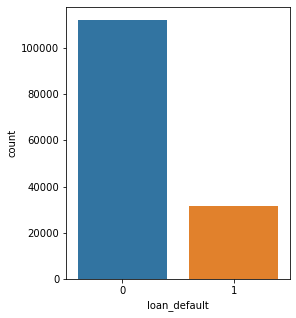

In [139]:
plt.figure(figsize=(4,5))
sns.countplot(train['loan_default'])

### Doing SMOTE to overcome the imbalance in the data

In [140]:
from imblearn.over_sampling import SMOTE


X = train.drop('loan_default',axis=1)
y = train['loan_default']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

1    112101
0    112101
Name: loan_default, dtype: int64

<AxesSubplot:xlabel='loan_default', ylabel='count'>

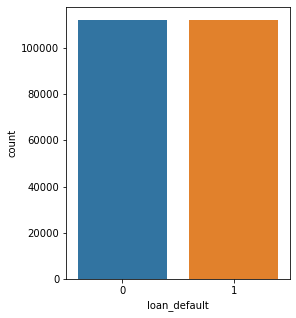

In [141]:
plt.figure(figsize=(4,5))
sns.countplot(y)

## Logistic Regression

In [91]:
from scipy.stats import zscore

In [92]:
train.columns

Index(['asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.CURRENT.BALANCE', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'NO.OF_INQUIRIES', 'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION_Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not Scored',
       'PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk',
       'State_ID_cat_High-Medium', 'State_ID_cat_Low', 'State_ID_cat_Medium',
       'State_ID_cat_Medium-Low', 'Age_30-40', 'Age_40-50', 'loan_default'],
      dtype='object')

### Train data set

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, plot_confusion_matrix, roc_curve, recall_score

In [95]:
X = train.drop(['loan_default'],axis=1)
y = train[['loan_default']]

In [96]:
features = ['asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.CURRENT.BALANCE', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'NO.OF_INQUIRIES', 'Employment.Type_Self employed',
       'State_ID_cat_High-Medium', 'State_ID_cat_Low', 'State_ID_cat_Medium',
       'State_ID_cat_Medium-Low', 'Age_30-40', 'Age_40-50'] 
X = train[features]
y = train[['loan_default']]

In [143]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = scaled

In [144]:
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2)
logisticRegr = LogisticRegression(C=1.0, class_weight=None,fit_intercept=True,max_iter=100)
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [145]:
pred = logisticRegr.predict(X_test)

In [146]:
score = accuracy_score(y_test,pred)
print('Accuracy :',score)

Accuracy : 0.7494090185991882


In [147]:
#Confusion matrix
cm_knn = confusion_matrix(y_test,pred)

cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

In [148]:
#Printing the results
print('Confusion matrix \n',cm_matrix_knn)
print(classification_report(pred, y_test))
print('ROC_AUC Score :',roc_auc_score(y_test, pred))

Confusion matrix 
                     Actual Positive:1  Actual Negative:0
Predict Positive:1              26896               6648
Predict Negative:0              10207              23510
              precision    recall  f1-score   support

           0       0.80      0.72      0.76     37103
           1       0.70      0.78      0.74     30158

    accuracy                           0.75     67261
   macro avg       0.75      0.75      0.75     67261
weighted avg       0.75      0.75      0.75     67261

ROC_AUC Score : 0.7495434583479567


In [103]:
## Validation the model

In [149]:
X = valid.drop('loan_default',axis=1)
y = valid['loan_default']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2)


In [151]:
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [152]:
pred = logisticRegr.predict(X_test)

In [153]:
score = accuracy_score(y_test,pred)
print('Accuracy :',score)

Accuracy : 0.7512185215272137


In [154]:
#Confusion matrix
cm_knn = confusion_matrix(y_test,pred)

cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

In [155]:
#Printing the results
print('Confusion matrix \n',cm_matrix_knn)
print(classification_report(pred, y_test))
print('ROC_AUC Score :',roc_auc_score(y_test, pred))

Confusion matrix 
                     Actual Positive:1  Actual Negative:0
Predict Positive:1               5951               1460
Predict Negative:0               2215               5146
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      8166
           1       0.70      0.78      0.74      6606

    accuracy                           0.75     14772
   macro avg       0.75      0.75      0.75     14772
weighted avg       0.76      0.75      0.75     14772

ROC_AUC Score : 0.751042672370739


In [110]:
### Testing the  model using the test dataset

In [156]:
X = test.drop('loan_default',axis=1)
y = test['loan_default']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [157]:
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2)
logisticRegr = LogisticRegression(C=1.0, class_weight=None,fit_intercept=True,max_iter=100)
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [158]:
pred = logisticRegr.predict(X_test)

In [159]:
score = accuracy_score(y_test,pred)
print('Accuracy :',score)

Accuracy : 0.751736593498194


In [160]:
#Confusion matrix
cm_knn = confusion_matrix(y_test,pred)

cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

In [161]:
#Printing the results
print('Confusion matrix \n',cm_matrix_knn)
print(classification_report(pred, y_test))
print('ROC_AUC Score :',roc_auc_score(y_test, pred))

Confusion matrix 
                     Actual Positive:1  Actual Negative:0
Predict Positive:1               5802               1339
Predict Negative:0               2235               5020
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      8037
           1       0.69      0.79      0.74      6359

    accuracy                           0.75     14396
   macro avg       0.75      0.76      0.75     14396
weighted avg       0.76      0.75      0.75     14396

ROC_AUC Score : 0.7522139215879107


### Conclusion 

Thus by the testing and validating the model after performing missing value imputation and feature engineering and feature selection using the VIF and T-test, An accuracy of 76% is obtained with a ROC value of 0.75.

### LIMITATIONS AND ENHANCEMENTS FOR MODEL

#### Limitations-

○ The recall of the final model is 0.72 which means there is still a 0.28 chance of
predicting False Negatives, i.e., loan defaulters who are predicted as non-defaulters.

○ Sensitive data - Complete information on the Loaness cannot be disclosed due to the
nature of the data, because of which there can be false predictions made

○ Outlier presence - Loan requirements differ from person to person, therefore
predicting for all of the loanees together can lead to misclassifications.

○ Real world problem - Getting complete information from the loanees and being able
to verify it completely is not easily achievable. Also having a better CNS score is
subjected to everyone having to get a CNS report, which might not be possible in
reality.

#### Enhancing Solutions -

○ Currently 52% of the loanees fall into the CNS Not Scored Category which comprises
of all of the following cases

■ No Bureau History Available

■ More than 50 active Accounts found

■ No Activity seen on the customer (Inactive)

■ No Updates available in last 36 months

■ Not Enough Info available on the customer

■ Sufficient History Not Available.

As CNS Not scored is an important feature, providing updates on the loanees or
gathering more information on them, might lead to better prediction. So financial
institutions should start laying more importance on CNS reports and complete
information submission, which can reduce the problems faced in this aspect.